# 0. 데이터 준비


## 0-1. 라이브러리 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import shap

import plotly.express as px
from plotly.offline import plot
from plotly.subplots import make_subplots

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

## 0-2. 데이터 불러오기

In [45]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Smokalyzer/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Smokalyzer/test.csv')

In [46]:
train_df

id  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0            0   55         165          60       81.0             0.5   
1            1   70         165          65       89.0             0.6   
2            2   20         170          75       81.0             0.4   
3            3   35         180          95      105.0             1.5   
4            4   30         165          60       80.5             1.5   
...        ...  ...         ...         ...        ...             ...   
159251  159251   40         155          45       69.0             1.5   
159252  159252   50         155          75       82.0             1.0   
159253  159253   40         160          50       66.0             1.5   
159254  159254   50         165          75       92.0             1.2   
159255  159255   40         145          45       76.4             1.0   

        eyesight(right)  hearing(left)  hearing(right)  systolic  ...  HDL  \
0                   0.6              1               1       135  ...   40   
1                   0.7              2               2       146  ...   57   
2                   0.5              1               1       118  ...   45   
3                   1.2              1               1       131  ...   38   
4                   1.0              1               1       121  ...   44   
...                 ...            ...             ...       ...  ...  ...   
159251              2.0              1               1       127  ...   72   
159252              1.0              1               1       120  ...   64   
159253              1.0              1               1       114  ...   87   
159254              1.0              1               1       121  ...   55   
159255              1.2              1               1       125  ...   87   

        LDL  hemoglobin  Urine protein  serum creatinine  AST  ALT  Gtp  \
0        75        16.5              1               1.0   22   25   27   
1       126        16.2              1               1.1   27   23   37   
2        93        17.4              1               0.8   27   31   53   
3       102        15.9              1               1.0   20   27   30   
4        93        15.4              1               0.8   19   13   17   
...     ...         ...            ...               ...  ...  ...  ...   
159251  159        14.5              1               0.8   25   26   13   
159252  108        14.5              1               0.6   21   20   18   
159253   93        10.9              1               0.6   15    9   12   
159254   80        14.4              1               1.1   22   17   37   
159255   81        14.0              1               0.8   21   16   17   

        dental caries  smoking  
0                   0        1  
1                   1        0  
2                   0        1  
3                   1        0  
4                   0        1  
...               ...      ...  
159251              0        0  
159252              0        0  
159253              0        0  
159254              0        1  
159255              0        0  

[159256 rows x 24 columns]

In [47]:
test_df

id  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0       159256   40         165          70       84.0             1.2   
1       159257   80         160          60       93.0             1.0   
2       159258   60         170          70       86.5             0.6   
3       159259   40         160          50       67.0             0.3   
4       159260   40         170          75       89.4             1.0   
...        ...  ...         ...         ...        ...             ...   
106166  265422   40         165          60       78.0             0.8   
106167  265423   40         170          85       95.0             1.2   
106168  265424   35         170          85       89.0             1.2   
106169  265425   40         160          60       67.0             0.7   
106170  265426   50         150          50       80.0             0.9   

        eyesight(right)  hearing(left)  hearing(right)  systolic  ...  \
0                   1.2              1               1       130  ...   
1                   1.0              2               2       144  ...   
2                   0.7              1               1       117  ...   
3                   0.4              1               1       116  ...   
4                   0.9              1               1       132  ...   
...                 ...            ...             ...       ...  ...   
106166              0.9              1               1       112  ...   
106167              1.2              1               1       130  ...   
106168              1.2              1               1       131  ...   
106169              0.8              1               1       120  ...   
106170              1.0              1               1       115  ...   

        triglyceride  HDL  LDL  hemoglobin  Urine protein  serum creatinine  \
0                186   49  115        14.2              1               0.9   
1                158   35  104        13.0              1               1.1   
2                173   39   88        15.4              1               1.4   
3                 47   75  128        14.5              1               0.6   
4                100   39  123        16.5              1               1.0   
...              ...  ...  ...         ...            ...               ...   
106166            82   59  149        16.4              1               1.1   
106167           186   44  100        16.0              2               1.0   
106168            76   53  142        15.9              1               0.8   
106169            81   55  103        13.9              1               0.6   
106170            96   48  144        13.0              1               0.6   

        AST  ALT  Gtp  dental caries  
0        19   25   32              0  
1        20   12   24              0  
2        38   60   36              0  
3        25   18   10              1  
4        30   39   27              1  
...     ...  ...  ...            ...  
106166   24   31   28              0  
106167   25   31   38              0  
106168   33   32   24              1  
106169   42   36   32              0  
106170   18   11   17              1  

[106171 rows x 23 columns]

# 1. 탐색적 데이터 분석(EDA)

## 1-1. 데이터 구조 및 기본 정보 확인

In [48]:
train_df.info() #결측치가 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [49]:
# 컬럼명 표준화
rename_columns = {
    'height(cm)': 'height_cm',
    'weight(kg)': 'weight_kg',
    'waist(cm)': 'waist_cm',
    'eyesight(left)': 'eyesight_left',
    'eyesight(right)': 'eyesight_right',
    'hearing(left)': 'hearing_left',
    'hearing(right)': 'hearing_right',
    'fasting blood sugar': 'fasting_blood_sugar',
    'serum creatinine': 'serum_creatinine',
    'Urine protein': 'urine_protein',
    'dental caries': 'dental_caries'
}

train_df.rename(columns=rename_columns, inplace=True)
test_df.rename(columns=rename_columns, inplace=True)

In [50]:
train_df.describe().T

count          mean           std    min       25%  \
id                   159256.0  79627.500000  45973.391572    0.0  39813.75   
age                  159256.0     44.306626     11.842286   20.0     40.00   
height_cm            159256.0    165.266929      8.818970  135.0    160.00   
weight_kg            159256.0     67.143662     12.586198   30.0     60.00   
waist_cm             159256.0     83.001990      8.957937   51.0     77.00   
eyesight_left        159256.0      1.005798      0.402113    0.1      0.80   
eyesight_right       159256.0      1.000989      0.392299    0.1      0.80   
hearing_left         159256.0      1.023974      0.152969    1.0      1.00   
hearing_right        159256.0      1.023421      0.151238    1.0      1.00   
systolic             159256.0    122.503648     12.729315   77.0    114.00   
relaxation           159256.0     76.874071      8.994642   44.0     70.00   
fasting_blood_sugar  159256.0     98.352552     15.329740   46.0     90.00   
Cholesterol          159256.0    195.796165     28.396959   77.0    175.00   
triglyceride         159256.0    127.616046     66.188989    8.0     77.00   
HDL                  159256.0     55.852684     13.964141    9.0     45.00   
LDL                  159256.0    114.607682     28.158931    1.0     95.00   
hemoglobin           159256.0     14.796965      1.431213    4.9     13.80   
urine_protein        159256.0      1.074233      0.347856    1.0      1.00   
serum_creatinine     159256.0      0.892764      0.179346    0.1      0.80   
AST                  159256.0     25.516853      9.464882    6.0     20.00   
ALT                  159256.0     26.550296     17.753070    1.0     16.00   
Gtp                  159256.0     36.216004     31.204643    2.0     18.00   
dental_caries        159256.0      0.197996      0.398490    0.0      0.00   
smoking              159256.0      0.437365      0.496063    0.0      0.00   

                         50%        75%       max  
id                   79627.5  119441.25  159255.0  
age                     40.0      55.00      85.0  
height_cm              165.0     170.00     190.0  
weight_kg               65.0      75.00     130.0  
waist_cm                83.0      89.00     127.0  
eyesight_left            1.0       1.20       9.9  
eyesight_right           1.0       1.20       9.9  
hearing_left             1.0       1.00       2.0  
hearing_right            1.0       1.00       2.0  
systolic               121.0     130.00     213.0  
relaxation              78.0      82.00     133.0  
fasting_blood_sugar     96.0     103.00     375.0  
Cholesterol            196.0     217.00     393.0  
triglyceride           115.0     165.00     766.0  
HDL                     54.0      64.00     136.0  
LDL                    114.0     133.00    1860.0  
hemoglobin              15.0      15.80      21.0  
urine_protein            1.0       1.00       6.0  
serum_creatinine         0.9       1.00       9.9  
AST                     24.0      29.00     778.0  
ALT                     22.0      32.00    2914.0  
Gtp                     27.0      44.00     999.0  
dental_caries            0.0       0.00       1.0  
smoking                  0.0       1.00       1.0

## 1-2. 타깃 변수 비율 확인

In [51]:
# Target 비율 확인
train_df['smoking'].value_counts()

smoking
0    89603
1    69653
Name: count, dtype: int64

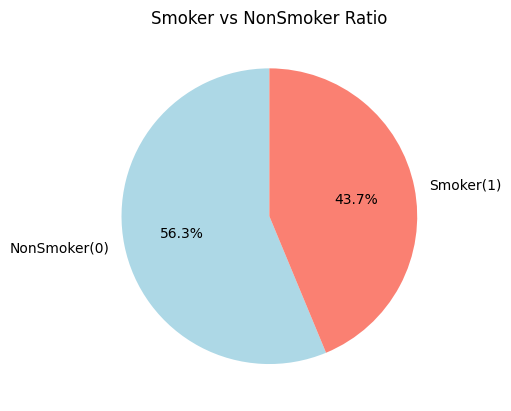

In [52]:
# Target 비율 확인 - 시각화
train_df['smoking'].value_counts().plot.pie(
    labels=['NonSmoker(0)', 'Smoker(1)'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title('Smoker vs NonSmoker Ratio')
plt.ylabel('')
plt.show()

## 1-3. 타깃 변수와의 관계 분석
- 예) 그룹별 평균, 바이올린 플롯 등


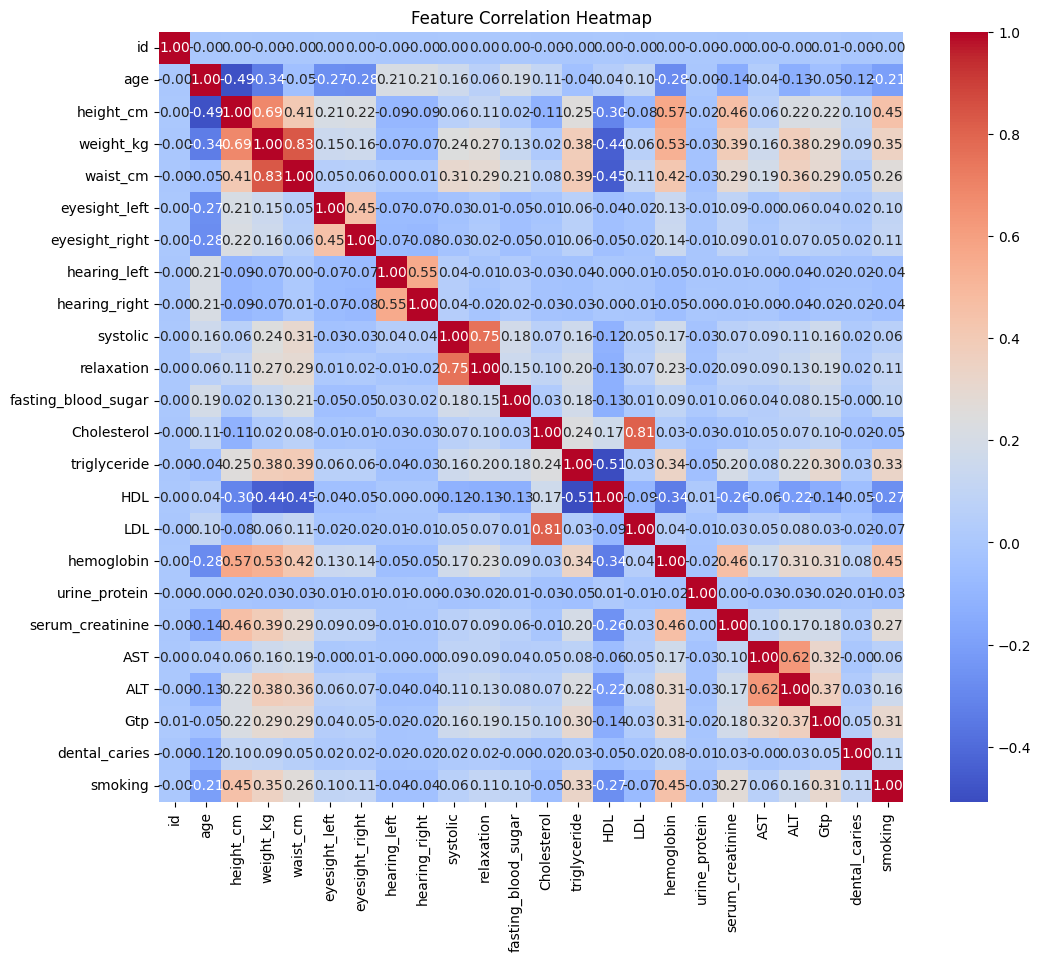

In [53]:
# 상관계수 행렬 계산
corr_matrix = train_df.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## 1-4. 변수 분포 시각화 (범주형/수치형)

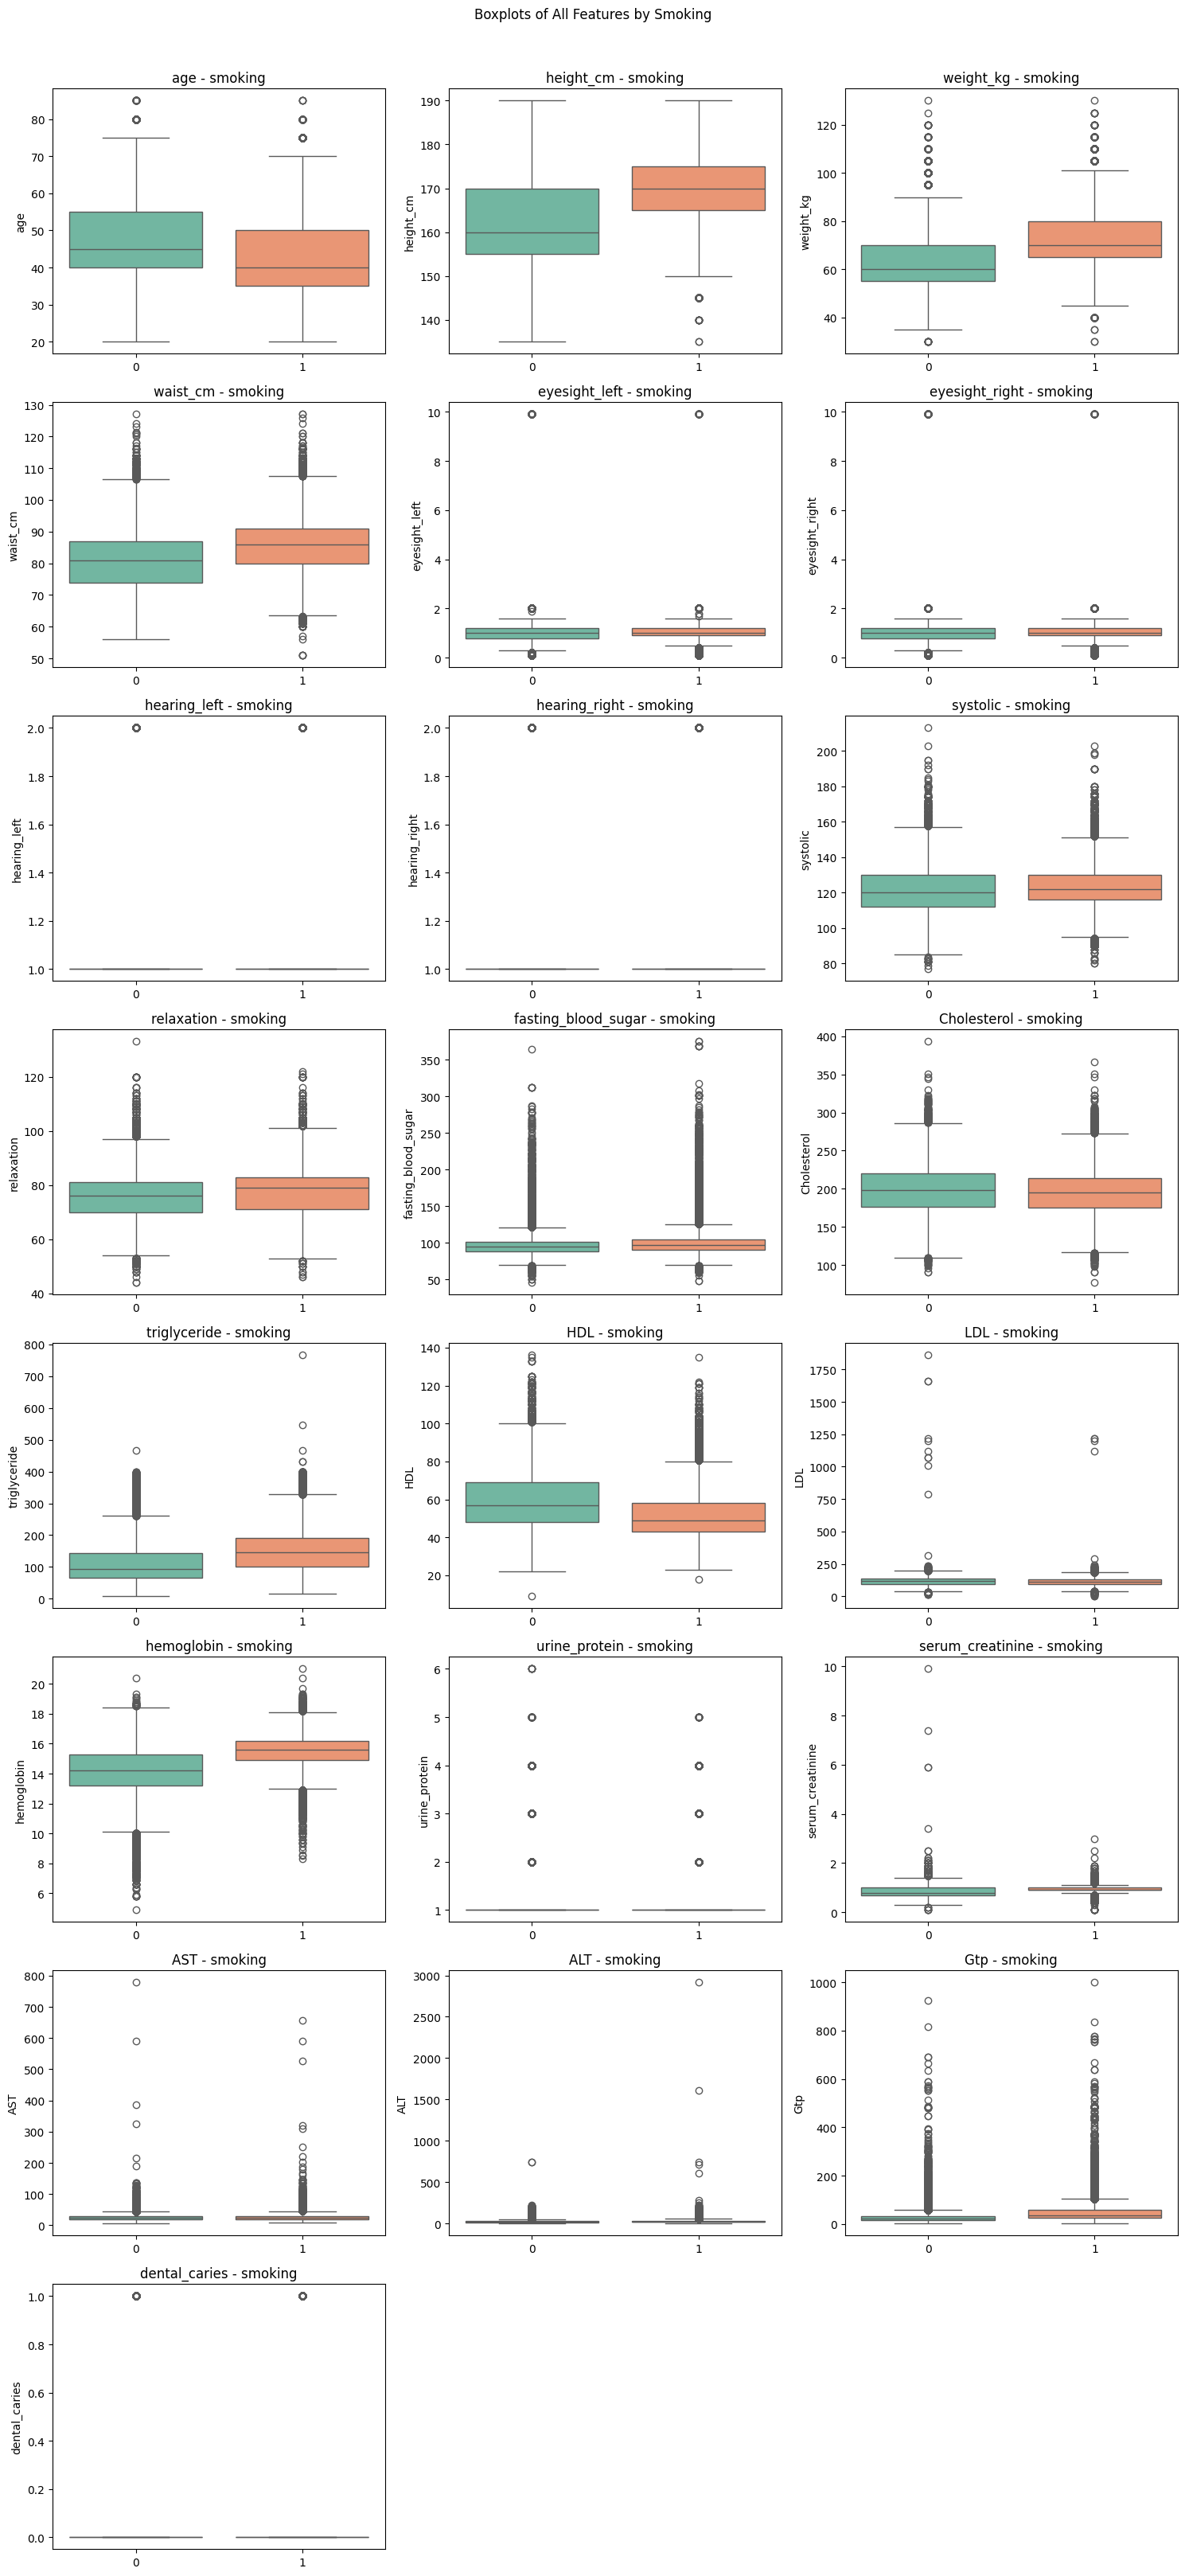

In [54]:
## boxplot
# 1. id와 smoking은 제외하고 모든 피처 선택
features = train_df.drop(columns=['id', 'smoking']).columns

# 2. subplot의 행/열
n_features = len(features)                    # 피처 개수
n_cols = 3                                    # 열 개수: 한 행에 몇 개의 그래프 그릴지
n_rows = (n_features + n_cols -1) // n_cols   # 필요한 행 개수

# 3. 캔버스 크기
plt.figure(figsize=(n_cols * 5, n_rows * 4))

# 4. 각 피처에 대해 반복하여 subplot에 boxplot 그리기
for i, col in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)  # (행, 열, 현재 순번)에 맞는 subplot 위치 지정
    sns.boxplot(                   # boxplot으로 피처별 분포 시각화
        data=train_df,
        x='smoking',               # x축은 흡연 여부 (0 or 1)
        y=col,                     # y축은 해당 피처의 값
        palette='Set2'
    )
    plt.title(f'{col} - smoking')   # 그래프 제목
    plt.xlabel('')                  # x축 레이블 생략 (0, 1로만 표현)
    plt.tight_layout()

plt.suptitle("Boxplots of All Features by Smoking", y=1.01)

plt.tight_layout()
plt.show()

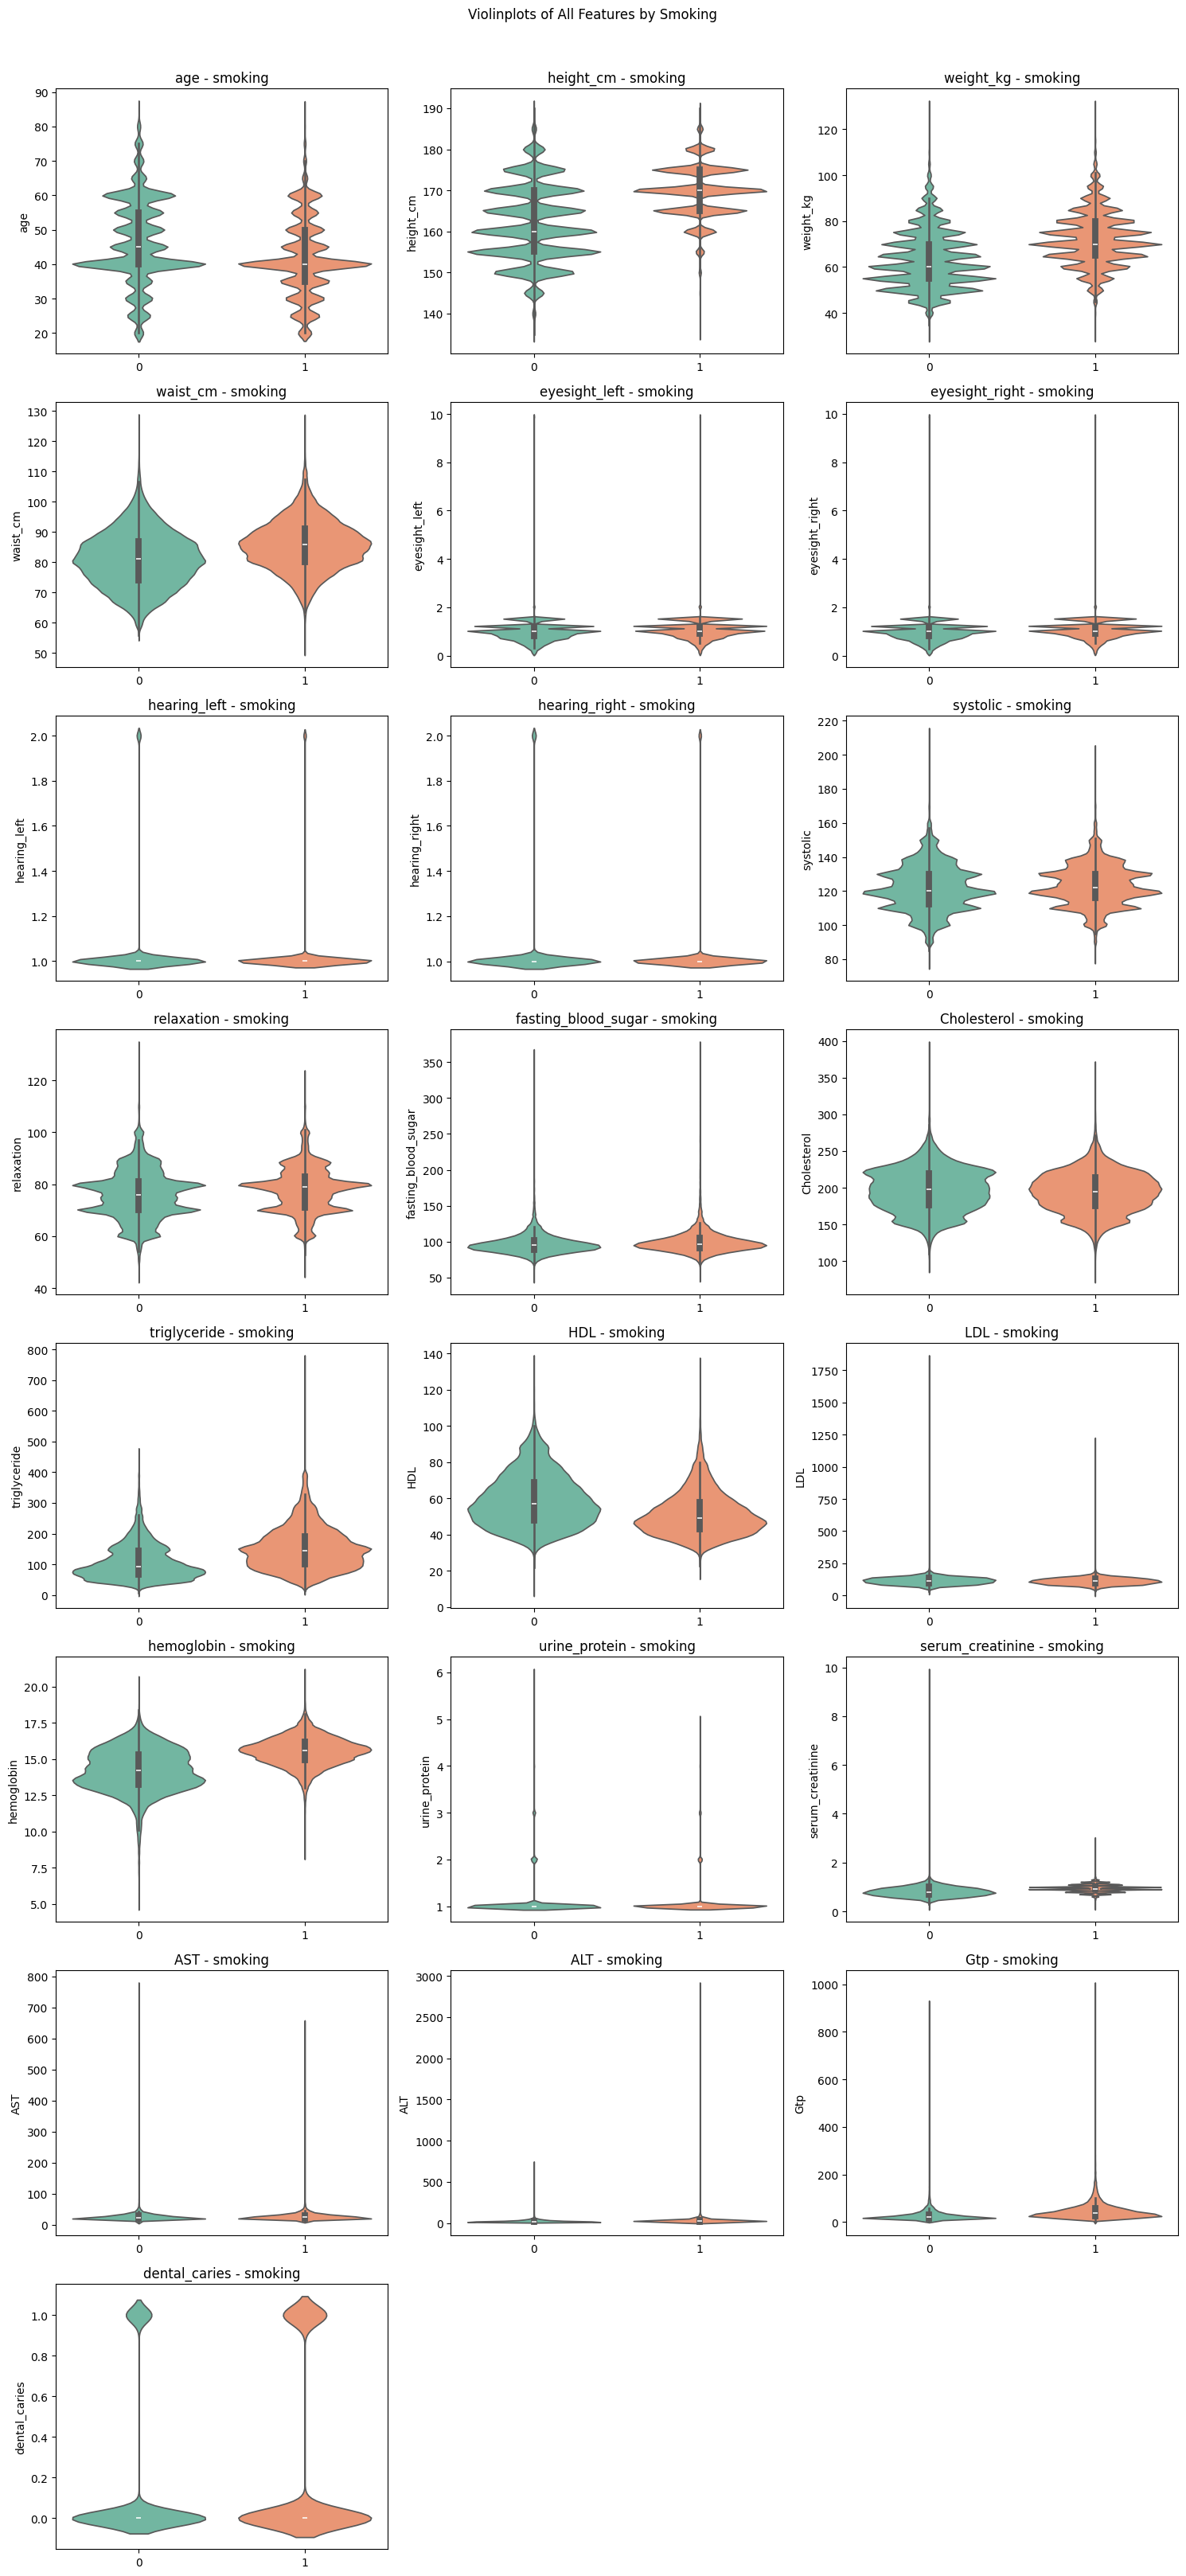

In [55]:
## Violinplot
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.violinplot(data=train_df, x='smoking', y=col, palette='Set2', inner='box')
    plt.title(f'{col} - smoking')
    plt.xlabel('')
    plt.tight_layout()

plt.suptitle('Violinplots of All Features by Smoking', y=1.01)
plt.tight_layout()
plt.show()

[Violinplot 해석]
- 넓은 영역: 해당 구간에 데이터가 많이 분포함(밀도 높음)
- 중앙 흰색 박스: Boxplot 내장(IQR + 중앙값)
- 꼬리: 극단치나 밀도가 낮은 영역
- 좌우 대칭이 아니라면 분포가 비대칭인 것

[피처별 결과]

| 피처                                   | 해석                                           |
| ------------------------------------ | ----------------------------------------------- |
| height(cm)                       | 흡연자 그룹이 전반적으로 키가 더 크고, 분포가 더 좁게 집중됨         |
| weight(kg)                       | 흡연자 쪽이 약간 더 무거움            |
| waist(cm)                        | 흡연자 쪽 허리둘레가 큼                           |
| systolic / relaxation (혈압)       | 흡연자 쪽이 중앙값도 높고 분포도 우측으로 더 퍼져 있음             |
| Gtp / ALT / AST (간수치)            | 흡연자 쪽에 긴 꼬리(극단치)와 분포 중심 상승 → 간 기능 관련 이상 가능성 |
| LDL / Cholesterol / triglyceride | 흡연자가 높은 밀도 중심 + 더 많은 고지혈 이상치 존재             |
| HDL                 | 흡연자에서 좋은 콜레스테롤(HDL)이 더 낮음 → 일반적 생리학 패턴과 일치함 |
| fasting blood sugar | 흡연자 쪽이 약간 더 높고 이상치 더 많음, 하지만 완전히 구분되진 않음        |
| hemoglobin          | 흡연자가 살짝 더 높은 중앙값을 가짐 → 만성 저산소증 보상 가능성 있음            |

## 1-5. 상관관계 분석
- 히트맵, pariplot 등

In [56]:
## 다중공선성 확인 - VIF(Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 수치형 변수만 선택
X = train_df.drop(columns=['smoking'])  # 타겟 제외

# 상수항 추가
X = add_constant(X)

# VIF 계산
vif_df = pd.DataFrame()
vif_df['feature'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df.sort_values('VIF', ascending=False))

                feature          VIF
0                 const  1244.431309
13          Cholesterol     7.333379
4             weight_kg     6.801537
16                  LDL     6.107157
5              waist_cm     4.588011
15                  HDL     3.221739
14         triglyceride     3.001240
3             height_cm     2.914232
10             systolic     2.456500
11           relaxation     2.409581
21                  ALT     1.986468
17           hemoglobin     1.848829
2                   age     1.819872
20                  AST     1.742144
9         hearing_right     1.465960
8          hearing_left     1.464441
19     serum_creatinine     1.405493
22                  Gtp     1.335092
7        eyesight_right     1.303434
6         eyesight_left     1.295456
12  fasting_blood_sugar     1.126582
23        dental_caries     1.021530
18        urine_protein     1.005057
1                    id     1.000136


In [57]:
## 어떤 피처끼리 상관관계가 있는지 확인
# 절댓값 기준으로 상관관계 높은 쌍만 추출
threshold = 0.6    # 조절 가능
high_corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    # np.ones로 전부 1인 행렬 만들고 → np.triu로 위쪽 삼각형(대각선 포함)만 남기기
    # k=1은 대각선은 제외하고 위쪽만 True로 설정
    .stack()
    .reset_index()
    .rename(columns={'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation'})
    .query('abs(Correlation) > @threshold')
    .sort_values(by='Correlation', ascending=False)
)

high_corr_pairs

Feature 1   Feature 2  Correlation
66     weight_kg    waist_cm     0.830208
212  Cholesterol         LDL     0.808533
171     systolic  relaxation     0.753003
45     height_cm   weight_kg     0.686645
266          AST         ALT     0.623408

- 다중공선성이 5이상인 피처 [5이상이면 주의 및 확인 권장 수치]
  - Cholesterol: 7.333379
  - weight(kg): 6.801537
  - LDL: 6.107157
- 각 피처들이 어떤 피처와 연관이 있는지 확인 [0.6이상]
  - weight(kg) - waist(cm)
  - Cholesterol - LDL
  - systolic - relaxion
  - height(cm) - weight(kig)
  - AST - ALT

In [58]:
# 히트맵으로 확인
fig = px.imshow(corr_matrix,
                text_auto='.2f',
                color_continuous_scale='RdBu_r',
                zmin=-1, zmax=1,
                title='Interactive Correlation Heatmap')
fig.show()

# 2. 데이터 엔지니어링

## 2-1. 결측치, 이상치 확인 및 처리

*   결측치 없음
*   이상치 확인

    -  eyesight(left/right) 시력 수치 => 9.9는 데이터 오류 => **2로 수정**
    -  triglyceride 중성지방 최대값: 766 => 고지혈증 의심
    -  LDL 300 이상 데이터 오류=> **300으로 처리**
    -  hemoglobin =>고산 지대 적응자 산소 부족 보상으로 혈색소 증가 가능
    -  serum creatinine => 9.9 말기신부전 / 대부분 투석 중이거나 직전 상태
    -  ALT, AST 이상치 => 독성 간염, 약물 유발성 손상 1000~3000 U/L까지 가능
    -  Gtp 500 ~ 999 => 중증 간질환, 알코올성 간질환, 간종양, 담관 폐쇄 등 가능
* 이상치 처리 (데이터 오류)
 - eyesight(left/right) : 9.9 => 2
 - LDL : 300 이상 => 300



**eyesight(left/right) 시력 수치 => 9.9는 데이터 오류 => 2로 수정**

In [3]:
# test용 - 추후 셀 제거
train_df = pd.read_csv('/content/drive/MyDrive/DS/Datathon/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/DS/Datathon/test.csv')

# 컬럼명 표준화
rename_columns = {
    'height(cm)': 'height_cm',
    'weight(kg)': 'weight_kg',
    'waist(cm)': 'waist_cm',
    'eyesight(left)': 'eyesight_left',
    'eyesight(right)': 'eyesight_right',
    'hearing(left)': 'hearing_left',
    'hearing(right)': 'hearing_right',
    'fasting blood sugar': 'fasting_blood_sugar',
    'serum creatinine': 'serum_creatinine',
    'Urine protein': 'urine_protein',
    'dental caries': 'dental_caries'
}

train_df.rename(columns=rename_columns, inplace=True)
test_df.rename(columns=rename_columns, inplace=True)

In [4]:
# 시력값 상한 처리: 2.0 초과 값은 2.0으로 클리핑
max_eyesight = 2.0

# 변환 전 2.0 초과 데이터 개수 확인
left_exceed = train_df[train_df['eyesight_left'] > max_eyesight].shape[0]
right_exceed = train_df[train_df['eyesight_right'] > max_eyesight].shape[0]

print(f'2.0 초과 시력 (왼쪽): {left_exceed}개')
print(f'2.0 초과 시력 (오른쪽): {right_exceed}개')

# 클리핑 처리
train_df['eyesight_left'] = train_df['eyesight_left'].clip(upper=max_eyesight)
train_df['eyesight_right'] = train_df['eyesight_right'].clip(upper=max_eyesight)

# 처리 후 데이터 개수 확인 (선택적)
left_valid = train_df[train_df['eyesight_left'] <= max_eyesight].shape[0]
right_valid = train_df[train_df['eyesight_right'] <= max_eyesight].shape[0]
print(f'변환 후 왼쪽 시력 ≤ 2.0: {left_valid}개')
print(f'변환 후 오른쪽 시력 ≤ 2.0: {right_valid}개')



# LDL 수치 상한값 설정 및 이상치 처리
ldl_threshold = 300

# 처리 전 이상치 개수 확인
ldl_exceed = train_df[train_df['LDL'] > ldl_threshold].shape[0]
print(f'처리 전 300 초과 LDL 수치 개수: {ldl_exceed}개')

# 이상치 클리핑 처리
train_df['LDL'] = train_df['LDL'].clip(upper=ldl_threshold)

# 처리 후 정상 범위 내 데이터 수 확인 (선택적)
ldl_valid = train_df[train_df['LDL'] <= ldl_threshold].shape[0]
print(f'처리 후 300 이하 LDL 수치 개수: {ldl_valid}개')

2.0 초과 시력 (왼쪽): 132개
2.0 초과 시력 (오른쪽): 117개
변환 후 왼쪽 시력 ≤ 2.0: 159256개
변환 후 오른쪽 시력 ≤ 2.0: 159256개
처리 전 300 초과 LDL 수치 개수: 15개
처리 후 300 이하 LDL 수치 개수: 159256개


**LDL 300 이상 데이터 오류=> 300으로 처리**

In [5]:
# LDL 수치 상한값 설정 및 이상치 처리
ldl_threshold = 300

# 처리 전 이상치 개수 확인
ldl_exceed = train_df[train_df['LDL'] > ldl_threshold].shape[0]
print(f'처리 전 300 초과 LDL 수치 개수: {ldl_exceed}개')

# 이상치 클리핑 처리
train_df['LDL'] = train_df['LDL'].clip(upper=ldl_threshold)

# 처리 후 정상 범위 내 데이터 수 확인 (선택적)
ldl_valid = train_df[train_df['LDL'] <= ldl_threshold].shape[0]
print(f'처리 후 300 이하 LDL 수치 개수: {ldl_valid}개')

처리 전 300 초과 LDL 수치 개수: 0개
처리 후 300 이하 LDL 수치 개수: 159256개


In [6]:
# # 이상치 클리핑 로직인데 혹시나 해서 넣어봤습니다

# import matplotlib.pyplot as plt
# import seaborn as sns
# import math

# # 'id' 제외
# numerical_cols = [
#     col for col in train_df.columns
#     if (train_df[col].dtype in ['int64', 'float64']) and (col != 'id')
# ]

# # 클리핑 전 백업
# train_df_before = train_df.copy()

# # 클리핑 수행
# clip_bounds = {}
# for col in numerical_cols:
#     lower = train_df[col].quantile(0.01)
#     upper = train_df[col].quantile(0.99)
#     clip_bounds[col] = (lower, upper)
#     train_df[col] = train_df[col].clip(lower, upper)

# # 시각화 (3개씩 나눠서)
# cols_per_page = 3
# num_cols = len(numerical_cols)
# num_pages = math.ceil(num_cols / cols_per_page)

# for page in range(num_pages):
#     start = page * cols_per_page
#     end = min(start + cols_per_page, num_cols)
#     sub_cols = numerical_cols[start:end]

#     fig, axes = plt.subplots(len(sub_cols), 2, figsize=(14, 4 * len(sub_cols)))
#     if len(sub_cols) == 1:
#         axes = [axes]  # 1개일 때 처리

#     for i, col in enumerate(sub_cols):
#         lower, upper = clip_bounds[col]
#         xmin = min(train_df_before[col].min(), train_df[col].min())
#         xmax = max(train_df_before[col].max(), train_df[col].max())

#         # Before Clipping
#         sns.histplot(train_df_before[col], bins=50, kde=True, ax=axes[i][0])
#         axes[i][0].axvline(lower, color='red', linestyle='--', label='1% quantile')
#         axes[i][0].axvline(upper, color='green', linestyle='--', label='99% quantile')
#         axes[i][0].set_title(f'[Before Clipping] {col}')
#         axes[i][0].set_xlim(xmin, xmax)
#         axes[i][0].legend()

#         # After Clipping
#         sns.histplot(train_df[col], bins=50, kde=True, ax=axes[i][1])
#         axes[i][1].axvline(lower, color='red', linestyle='--', label='1% quantile')
#         axes[i][1].axvline(upper, color='green', linestyle='--', label='99% quantile')
#         axes[i][1].set_title(f'[After Clipping] {col}')
#         axes[i][1].set_xlim(xmin, xmax)
#         axes[i][1].legend()

#     plt.tight_layout()
#     plt.show()

## 2-2. 피처 엔지니어링(컬럼 생성,삭제 등)

### 2.2.1 Gender

In [7]:
# 원본 데이터셋을 이용해서 gender 피처 생성
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download('kukuroo3/body-signal-of-smoking')

smoking_orig = pd.read_csv(path + '/' + os.listdir(path)[0])
print(smoking_orig.info())
smoking_orig.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0      F   40         155          60       81.3             1.2   
1   1      F   40         160          60       81.0             0.8   
2   2      M   55         170          60       80.0             0.8   
3   3      M   40         165          70       88.0             1.5   
4   4      F   40         155          60       86.0             1.0   

   eyesight(right)  hearing(left)  hearing(right)  ...  hemoglobin  \
0              1.0            1.0             1.0  ...        12.9   
1              0.6            1.0             1.0  ...        12.7   
2              0.8            1.0             1.0  ...        15.8   
3              1.5            1.0             1.0  ...        14.7   
4              1.0            1.0             1.0  ...        12.5   

   Urine protein  serum creatinine   AST   ALT   Gtp  oral  dental caries  \
0            1.0               0.7  18.0  19.0  27.0     Y              0   
1            1.0               0.6  22.0  19.0  18.0     Y              0   
2            1.0               1.0  21.0  16.0  22.0     Y              0   
3            1.0               1.0  19.0  26.0  18.0     Y              0   
4            1.0               0.6  16.0  14.0  22.0     Y              0   

   tartar  smoking  
0       Y        0  
1       Y        0  
2       N        1  
3       Y        0  
4       N        0  

[5 rows x 27 columns]

In [8]:
new_features = []

In [9]:
smoking_orig.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

In [10]:
# 컬럼명 표준화
rename_columns = {
    'ID':'id',
    'height(cm)': 'height_cm',
    'weight(kg)': 'weight_kg',
    'waist(cm)': 'waist_cm',
    'eyesight(left)': 'eyesight_left',
    'eyesight(right)': 'eyesight_right',
    'hearing(left)': 'hearing_left',
    'hearing(right)': 'hearing_right',
    'fasting blood sugar': 'fasting_blood_sugar',
    'serum creatinine': 'serum_creatinine',
    'Urine protein': 'urine_protein',
    'dental caries': 'dental_caries'
}

smoking_orig.rename(columns=rename_columns, inplace=True)

In [11]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate

# gender 예측을 위한 입력 데이터(X)와 타겟(y) 정의
X_0 = smoking_orig.drop(columns=['gender', 'oral', 'tartar', 'smoking'])  # 예측에 불필요한 컬럼 제거. oral-구강검진 여부/tartar-치석상태 검진
y_0 = smoking_orig['gender'].map({'F': 0, 'M': 1})  # 성별 문자 → 숫자로 인코딩 (F:0, M:1)

# Stratified K-Fold 교차 검증 설정 (성별 비율 유지)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# XGBoost로 성별 예측 모델 학습 + 교차 검증으로 AUC 평가
gender_model_results = cross_validate(
    XGBClassifier(n_jobs=-1, random_state=42),  # XGBoost 분류기 정의
    X_0, y_0,                        # 입력/타겟 전달
    scoring='roc_auc',                         # 평가 지표: AUC
    cv=kfold,                                   # Stratified 5-fold 교차 검증
    return_estimator=True                      # 학습된 모델들을 반환
)

# AUC 평균 및 표준편차 출력 (성능 확인)
print(f"AUC mean: {gender_model_results['test_score'].mean():.4f}, {gender_model_results['test_score'].std():.4f}")

AUC mean: 0.9972, 0.0004


In [12]:
# train_df와 smoking_orig의 공통 컬럼을 기준으로 예측에 사용할 feature 선택
target_features = [col for col in X_0.columns if col in train_df.columns]

# 초기화
train_df['gender'] = 0

# 각 fold의 모델을 활용하여 남성일 확률 예측 → 평균
for clf in gender_model_results['estimator']:
    train_df['gender'] += clf.predict_proba(train_df[target_features])[:, 1]

# 평균 확률로 정규화
train_df['gender'] /= len(gender_model_results['estimator'])

# test 데이터에도 동일한 방식으로 gender 확률값 추가
test_df['gender'] = 0  # 초기화
for clf in gender_model_results['estimator']:
    test_df['gender'] += clf.predict_proba(test_df[target_features])[:, 1]
test_df['gender'] /= len(gender_model_results['estimator'])

# new_features 리스트에 추가
new_features.append('gender')

In [13]:
# 0~1 사이 확률로 들어 있음 (남성일 확률)
train_df['gender'].describe()

count    1.592560e+05
mean     6.793589e-01
std      4.506190e-01
min      3.088894e-07
25%      1.626315e-02
50%      9.991833e-01
75%      9.999852e-01
max      1.000000e+00
Name: gender, dtype: float64

<Axes: >

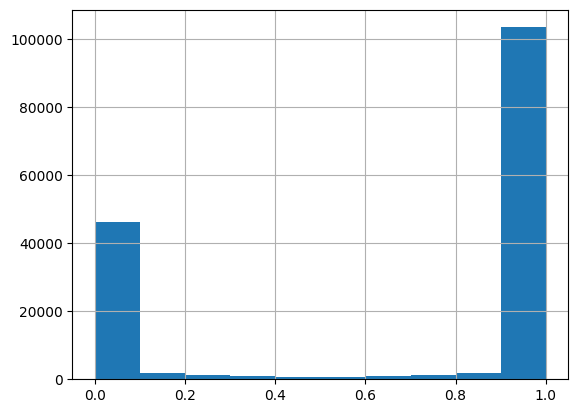

In [14]:
train_df['gender'].hist()

In [177]:
# # gender_binary: 성별 이진 분류 - 주리님
# # 0.5 이상이면 남성(1), 아니면 여성(0)으로 설정
# train_df['gender_binary'] = (train_df['gender'] >= 0.5).astype(int)

### 2.2.2 기본 파생 피처 생성

In [15]:
def add_basic_features(df):
    # BMI
    df['BMI'] = df['weight_kg'] / ((df['height_cm'] / 100) ** 2)
    new_features.append('BMI')

    # WHtR
    df['WHTR'] = df['waist_cm'] / df['height_cm']
    new_features.append('WHTR')

    # Pulse Pressure
    df['pulse_pressure'] = df['systolic'] - df['relaxation']
    new_features.append('pulse_pressure')

    # MAP
    df['MAP'] = df['relaxation'] + (df['systolic'] - df['relaxation']) / 3
    new_features.append('MAP')

    # LDL / Cholesterol 비율
    df['LDL_ratio'] = df['LDL'] / df['Cholesterol']
    new_features.append('LDL_ratio')

    return df

### 2.2.3 범주형 파생 피처 생성

In [16]:
def add_categorical_features(df):
    # 혈압 등급
    df['BP_level'] = df.apply(
        lambda row: 4 if row['systolic'] >= 160 or row['relaxation'] >= 100 else
                    3 if 140 <= row['systolic'] <= 159 or 90 <= row['relaxation'] <= 99 else
                    2 if 130 <= row['systolic'] <= 139 or 80 <= row['relaxation'] <= 89 else
                    1 if 120 <= row['systolic'] <= 129 and row['relaxation'] < 80 else
                    0 if row['systolic'] < 120 and row['relaxation'] < 80 else
                    -1,
        axis=1
    )
    new_features.append('BP_level')

    # BP 카테고리
    df['BP_category'] = pd.cut(df['systolic'], bins=[0, 120, 130, 140, 180, np.inf], labels=[0, 1, 2, 3, 4]).astype('int')
    new_features.append('BP_category')

    # 콜레스테롤 관련
    df['total_cholesterol_risk'] = pd.cut(df['Cholesterol'], bins=[0, 200, 240, np.inf], labels=[0, 1, 2]).astype('int')
    df['HDL_risk'] = pd.cut(df['HDL'], bins=[0, 40, 60, np.inf], labels=[0, 1, 2]).astype('int')
    df['LDL_risk'] = pd.cut(df['LDL'], bins=[0, 100, 130, 160, 190, np.inf], labels=[0, 1, 2, 3, 4]).astype('int')
    new_features.extend(['total_cholesterol_risk', 'HDL_risk', 'LDL_risk'])

    # 나이 기반 위험군
    df['age_risk'] = (df['age'] >= 45).astype(int)
    new_features.append('age_risk')

    return df

### 2.2.4 상호작용 피처 생성

- 상호작용(Interaction) 피처 생성 함수

In [17]:
def add_interaction_features(df):
    # BMI x AST
    df['BMI_AST'] = df['BMI'] * df['AST']
    new_features.append('BMI_AST')

    # 허리 x LDL
    df['waist_LDL'] = df['waist_cm'] * df['LDL']
    new_features.append('waist_LDL')

    # 헤모글로빈 기반 상호작용
    df['hemoglobin_sq'] = df['hemoglobin'] ** 2
    df['hemoglobin_x_height'] = df['hemoglobin'] * df['height_cm']
    df['hemoglobin_x_weight'] = df['hemoglobin'] * df['weight_kg']
    df['hemoglobin_x_Gtp'] = df['hemoglobin'] * df['Gtp']
    df['hemoglobin_x_creatinine'] = df['hemoglobin'] * df['serum_creatinine']
    df['weight_x_height'] = df['weight_kg'] * df['height_cm']

    new_features.extend([
        'hemoglobin_sq', 'hemoglobin_x_height', 'hemoglobin_x_weight',
        'hemoglobin_x_Gtp', 'hemoglobin_x_creatinine', 'weight_x_height'
    ])

    return df

In [18]:
# 학습/테스트 데이터에 피처 적용
train_df = add_basic_features(train_df)
train_df = add_categorical_features(train_df)
train_df = add_interaction_features(train_df)

test_df = add_basic_features(test_df)
test_df = add_categorical_features(test_df)
test_df = add_interaction_features(test_df)

In [19]:
new_features = list(dict.fromkeys(new_features))  # 순서 유지하며 중복 제거

### 2.2.5 다중공선성 확인

In [20]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = train_df[new_features].copy()
X = add_constant(X)

vif_df = pd.DataFrame()
vif_df['feature'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# VIF 높은 순서로 확인
print(vif_df.sort_values(by='VIF', ascending=False))

                    feature          VIF
0                     const  4381.266953
17      hemoglobin_x_weight   363.954302
20          weight_x_height   259.685006
16      hemoglobin_x_height   224.118217
15            hemoglobin_sq   208.679736
2                       BMI    33.625003
14                waist_LDL    19.797808
11                 LDL_risk     7.409234
3                      WHTR     6.385824
8               BP_category     5.736038
5                       MAP     5.568760
6                 LDL_ratio     5.132590
7                  BP_level     5.041540
1                    gender     4.995548
9    total_cholesterol_risk     3.707479
19  hemoglobin_x_creatinine     2.608591
4            pulse_pressure     2.066988
10                 HDL_risk     1.534032
13                  BMI_AST     1.448001
18         hemoglobin_x_Gtp     1.378502
12                 age_risk     1.367881


In [21]:
# new_features = []  # 필요 시 수행

In [22]:
# test_df의 id 백업
test_ids = test_df['id'].values.copy()

In [23]:
# ID 제거
train_df.drop(columns='id', inplace=True)
test_df.drop(columns='id', inplace=True)

## 2-3. 피처 엔지니어링에 대한 시각화

### 2.3.1 Smoking과의 상관성 top10

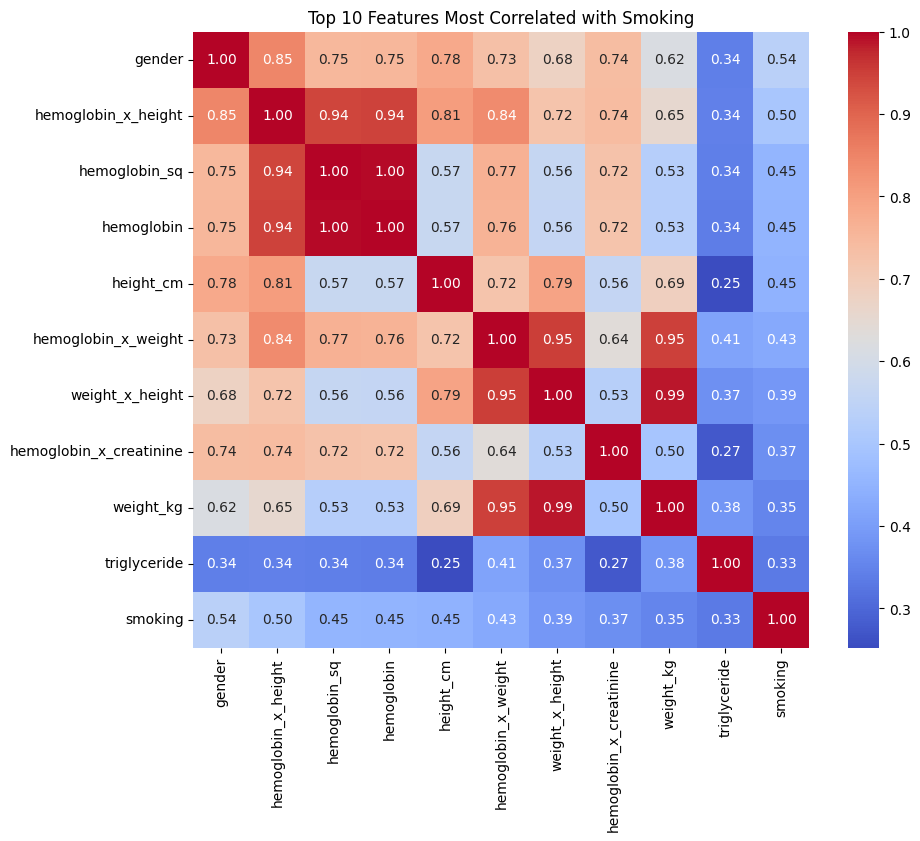

In [81]:
# Smoking과의 상관계수 행렬 계산
# 수치형만 포함
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = train_df[numeric_cols].corr()

# smoking과의 상관계수만 추출
smoking_corr = corr_matrix['smoking'].drop('smoking') # 자기 자신 제외
top10_features = smoking_corr.abs().sort_values(ascending=False).head(10).index.tolist()

# 4. 상위 10개 피처 + smoking 포함된 서브 상관 행렬
selected_corr = corr_matrix.loc[top10_features + ['smoking'], top10_features + ['smoking']]

# 5. 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(selected_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Top 10 Features Most Correlated with Smoking')
plt.show()

In [82]:
# 전체 상관계수 확인
print(smoking_corr.abs().sort_values(ascending=False))

gender                     0.537421
hemoglobin_x_height        0.500258
hemoglobin_sq              0.452000
hemoglobin                 0.450679
height_cm                  0.447111
hemoglobin_x_weight        0.426698
weight_x_height            0.388065
hemoglobin_x_creatinine    0.371292
weight_kg                  0.351748
triglyceride               0.331975
hemoglobin_x_Gtp           0.330105
Gtp                        0.305561
serum_creatinine           0.272979
HDL                        0.271186
waist_cm                   0.262715
HDL_risk                   0.243638
age                        0.206033
age_risk                   0.175738
ALT                        0.163016
eyesight_right             0.143583
BMI                        0.141723
eyesight_left              0.134450
relaxation                 0.109501
dental_caries              0.106636
BMI_AST                    0.097921
fasting_blood_sugar        0.096534
MAP                        0.094256
LDL_risk                   0

### 2.3.2 상관성 Top6 Pairplot

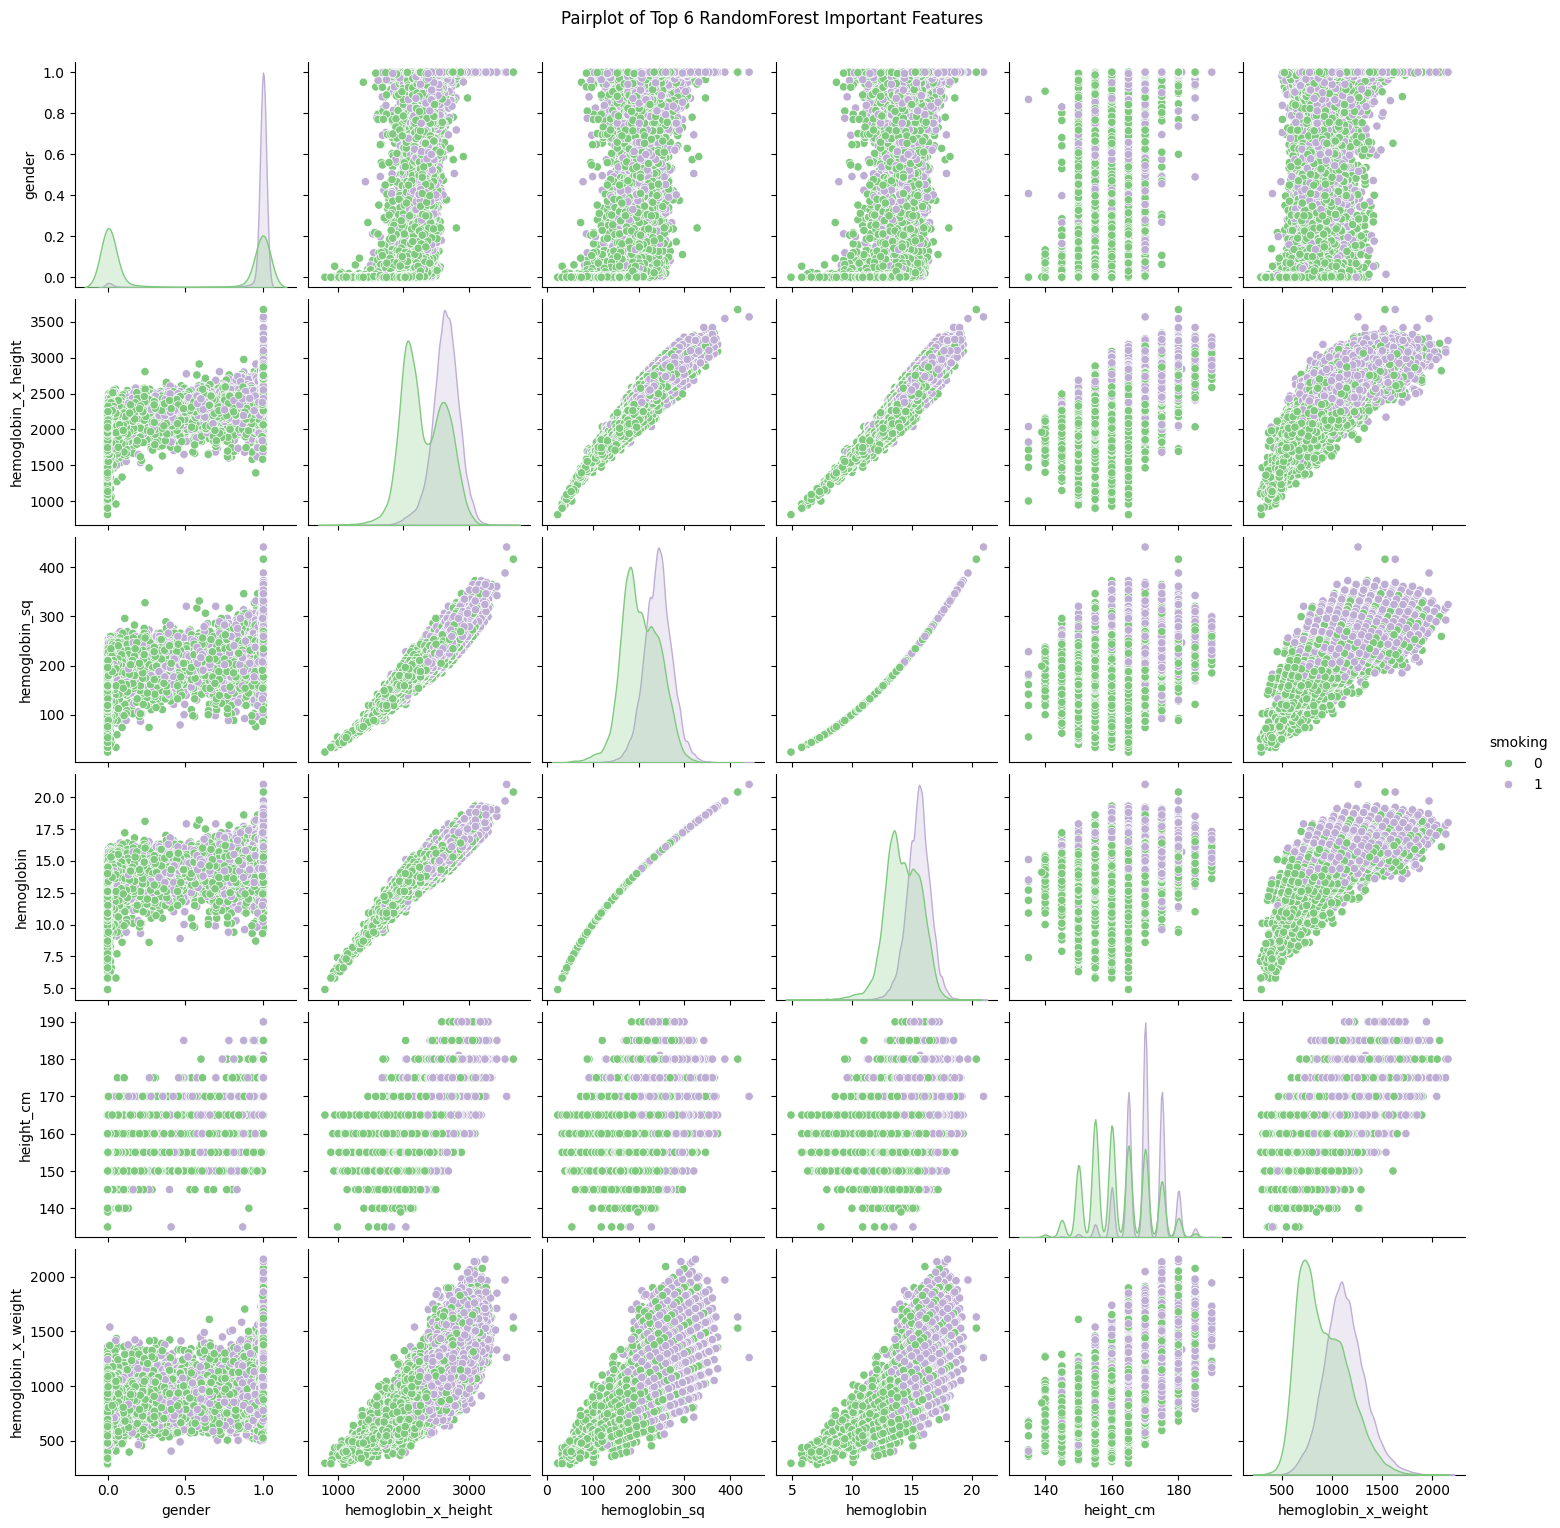

In [83]:
# 상위 6개 Pairplot을 위한 데이터셋 구성
top6_features = smoking_corr.abs().sort_values(ascending=False).head(6).index.tolist()
pairplot_df = train_df[top6_features + ['smoking']]

# Pairplot 시각화
# 초록색이 0 / 보라색이 1
sns.pairplot(pairplot_df, hue='smoking', palette='Accent', diag_kind='kde')
plt.suptitle("Pairplot of Top 6 RandomForest Important Features", y=1.02)
plt.show()

### 2.3.3 New Features에 대한 Violinplot

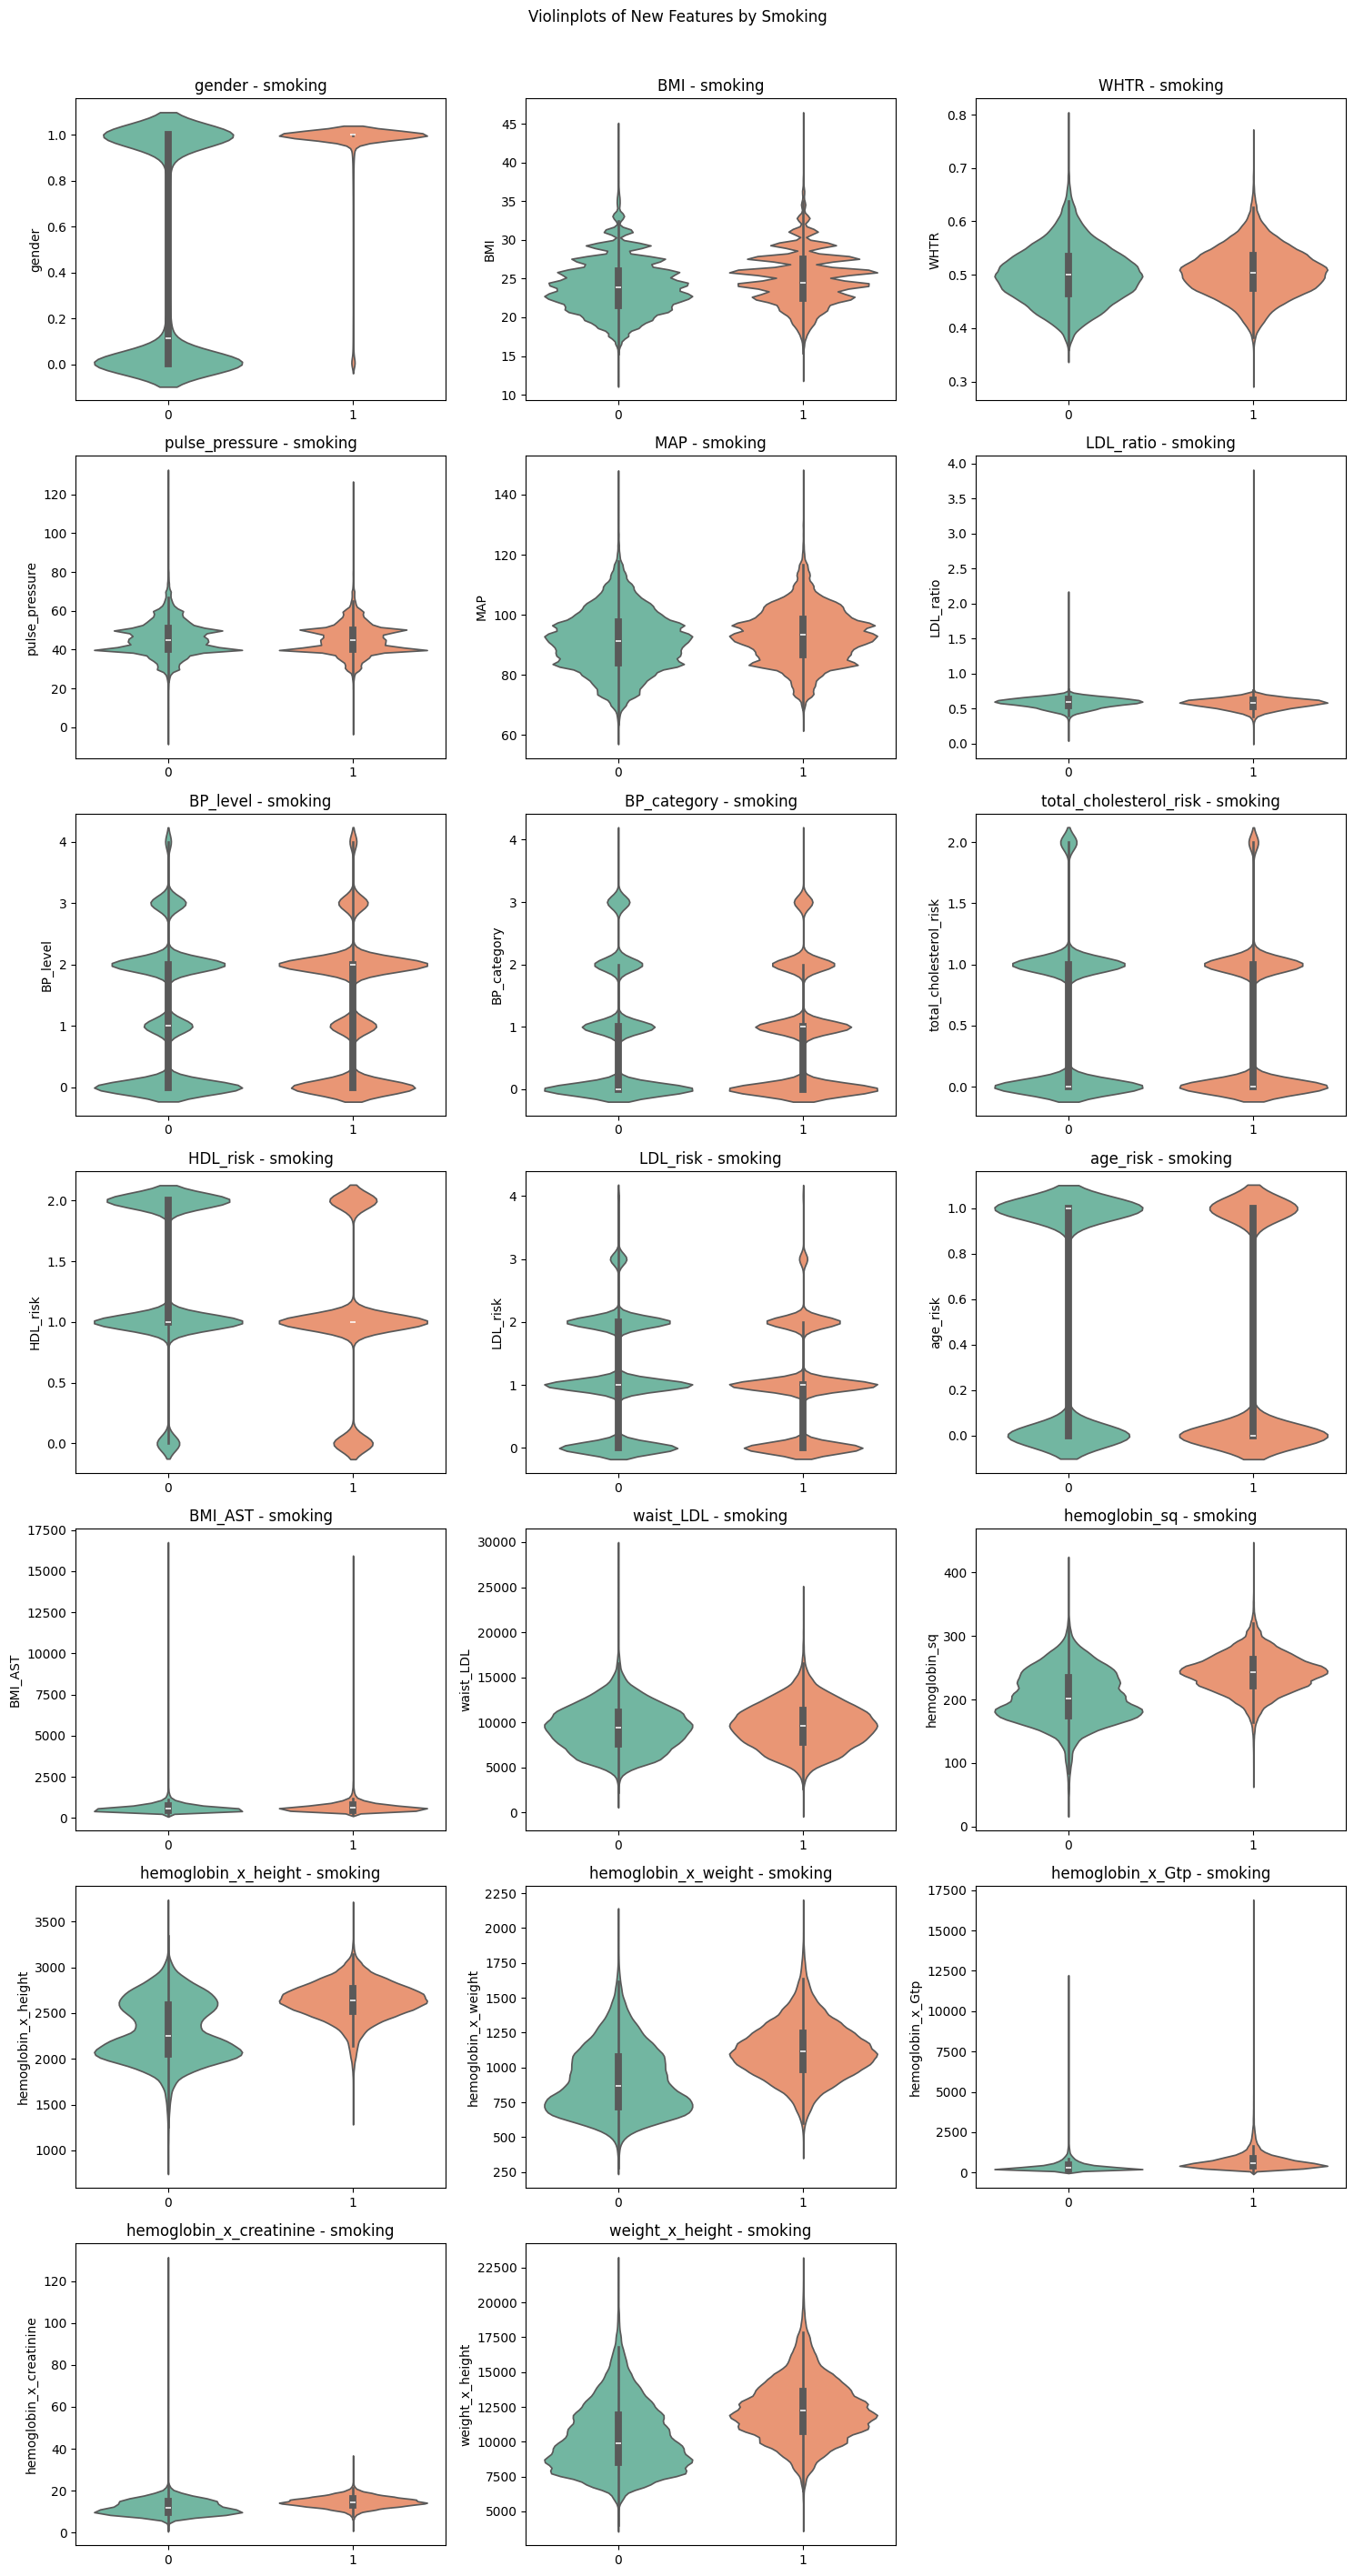

In [84]:
## Violinplot - 추가된 피처들에 대한 시각화
# new_features = ['BMI', 'gender', 'BP_level', 'WHTR', 'pulse_pressure', 'MAP', 'LDL_ratio',
#                 'BP_category', 'total_cholesterol_risk', 'HDL_risk', 'LDL_risk', 'BMI_AST', 'waist_LDL', 'age_risk']
n_features = len(new_features)
n_cols = 3                                    # 열 개수: 한 행에 몇 개의 그래프 그릴지
n_rows = (n_features + n_cols -1) // n_cols   # 필요한 행 개수
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(new_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.violinplot(data=train_df, x='smoking', y=col, palette='Set2', inner='box')
    plt.title(f'{col} - smoking')
    plt.xlabel('')
    plt.tight_layout()

plt.suptitle('Violinplots of New Features by Smoking', y=1.01)
plt.tight_layout()
plt.show()

| 피처                           | 해석                                                                      |
| ---------------------------- | ----------------------------------------------------------------------- |
| **BMI**                      | 흡연자와 비흡연자 모두 비슷한 중앙값이나, 흡연자 그룹이 꼬리 길이가 길고 극단치 존재함. 약간 더 넓게 퍼져 있음.   |
| **gender / gender\_binary**  | 흡연자 대부분이 남성(1)으로 분포, 비흡연자는 남녀 혼합. → 흡연자 = 남성 중심 분포                  |
| **BP\_level**                | 흡연자가 고혈압 단계(2\~4)에 더 많이 분포되어 있음. 비흡연자는 낮은 단계(0\~1)에 집중. |
| **WHTR (허리-키 비율)**           | 흡연자 쪽이 전체적으로 더 작고 낮은 WHTR에 집중됨. 그러나 차이는 크지 않음.                      |
| **pulse\_pressure (맥압)**     | 흡연자가 맥압 분포가 더 크고 퍼짐. 중간값도 살짝 높음.                                    |
| **MAP (평균 동맥압)**             | 흡연자가 전반적으로 MAP 평균값과 분포가 높음, 고혈압 위험 경향                               |
| **LDL\_ratio**               | 흡연자가 LDL 비율이 더 높은 방향으로 치우침, 극단치 포함                                  |
| **BP\_category**             | 흡연자가 위험한 혈압 범주(3\~4)에 더 많이 분포되어 있음.                             |
| **total\_cholesterol\_risk** | 흡연자 쪽이 중간값이 살짝 더 높고 분포가 평평함, 고지혈 위험군 포함 가능성                         |
| **HDL\_risk**                | 흡연자는 HDL이 낮은 그룹(위험군)에 집중됨. → 일반적으로 HDL이 낮을수록 심혈관 위험 증가          |
| **LDL\_risk**                | 흡연자는 LDL 위험군에 더 많이 분포되어 있음. 중앙값도 약간 더 높음                            |
| **AST\_ALT\_ratio**          | 분포에 뚜렷한 차이는 없지만, 흡연자 쪽에 긴 꼬리(극단치) 존재                              |
| **AST\_GTP\_ratio**          | 흡연자 쪽 분포가 조금 더 넓지만, 큰 차이는 없음                                            |
| **ALT\_GTP\_ratio**          | 흡연자 쪽에 **극단적인 고값 outlier 존재** → 일부 흡연자에서 간수치 이상 가능성 시사                  |


<br>

## 2.4 Feature Selection

VIF가 100 이상인 피처

- hemoglobin_x_weight, weight_x_height, hemoglobin_x_height, hemoglobin_sq 등 상호작용 파생변수 → 중복/유사 정보 가능성

상관계수가 0.1 이하인 피처

- BP_category, pulse_pressure, urine_protein, hearing_left/right, WHTR, waist_LDL, Cholesterol, total_cholesterol_risk, systolic, AST 등 → 제거 후보


| 기준                        | 설명                      | 제거 기준     |
| ------------------------- | ----------------------- | --------- |
| **VIF (다중공선성)**        | 10 이상 → 강한 다중공선성 우려     | **제거**    |
| **타겟 상관계수**            | 0.1 미만 → 타겟 예측에 기여도 낮음  | **제거 후보** |
| **Feature Importance** | 0.01 미만 → 모델 내 기여 거의 없음 | **제거 후보** |



In [24]:
# Feature Importance ≤ 0.01 피처 목록
low_importance = [
    'serum_creatinine', 'eyesight_left', 'eyesight_right',
    'weight_kg', 'BP_level', 'HDL_risk', 'BP_category',
    'dental_caries', 'LDL_risk', 'age_risk',
    'total_cholesterol_risk', 'urine_protein',
    'hearing_right', 'hearing_left'
]

# VIF ≥ 100 또는 중복 특성
high_vif = [
    'hemoglobin_x_weight', 'weight_x_height',
    'hemoglobin_x_height', 'hemoglobin_sq'
]

# 최종 제거 리스트
drop_features = list(set(low_importance + high_vif))

In [25]:
# drop 후보 컬럼 제거
train_df.drop(columns=drop_features, inplace=True)
test_df.drop(columns=drop_features, inplace=True)

# new_features 리스트도 업데이트
new_features = [f for f in new_features if f not in drop_features]

In [26]:
# 선택된 피처로 다중공선성 확인

from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = train_df[new_features].copy()
X = add_constant(X)

vif_df = pd.DataFrame()
vif_df['feature'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# VIF 확인
print(vif_df.sort_values(by='VIF', ascending=False))

                    feature         VIF
0                     const  338.044054
8                 waist_LDL    3.818469
3                      WHTR    3.333958
2                       BMI    3.304556
6                 LDL_ratio    2.881873
1                    gender    2.398589
10  hemoglobin_x_creatinine    2.259232
7                   BMI_AST    1.429352
9          hemoglobin_x_Gtp    1.348746
5                       MAP    1.284237
4            pulse_pressure    1.166800


- 다중공선성 문제를 방지하기 위해 VIF(Variance Inflation Factor)가 10 이상인 변수는 제거 후보로 선정하였다.
- 또한, 타겟(smoking)과의 Pearson 상관계수가 0.1 미만인 변수는 예측에 유의미한 영향을 주기 어렵다고 판단하여 제외하였다.
- 최종적으로 상호작용 항 중 유사 정보가 중복되는 항목들과 생리적 의미가 약한 항목을 제거하여 일반화 성능을 향상시키고 모델의 해석력을 높였다.

<br>
<br>

# 3. 데이터 분리 및 전처리

## 3-1. 학습/검증 데이터 분리(train/test split)

- train/test 데이터 분리 함수

In [27]:
from sklearn.model_selection import train_test_split

def get_train_test_dataset(df):
    """
    이진 분류용 데이터셋에서 feature/target 분리 후,
    학습용/검증용 데이터로 분할하는 함수

    Parameters
    ----------
    df : pd.DataFrame
        전처리 완료된 학습용 데이터프레임 (smoking 포함)

    Returns
    -------
    X_train : pd.DataFrame
        학습용 feature 데이터
    X_test : pd.DataFrame
        테스트용 feature 데이터 (성능 평가용)
    y_train : pd.Series
        학습용 타겟 값
    y_test : pd.Series
        테스트용 타겟 값
    """

    df_copy = df.copy()

    # feature/target 분리
    X_features = df_copy.drop(columns='smoking')
    y_target = df_copy['smoking']

    # stratified split
    X_train, X_test, y_train, y_test = train_test_split(
        X_features, y_target,
        test_size=0.3,
        random_state=42,
        stratify=y_target
    )

    return X_train, X_test, y_train, y_test

- train/test 데이터 분리

In [28]:
# 데이터 전처리 후, feature/label 분리 후 train/test 셋 분리
X_train, X_test, y_train, y_test = get_train_test_dataset(train_df)

In [90]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print()
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)
print()
print('원본 전체 데이터 비율')
print(train_df['smoking'].value_counts(normalize=True) * 100)

학습 데이터 레이블 값 비율
smoking
0    56.263512
1    43.736488
Name: count, dtype: float64

테스트 데이터 레이블 값 비율
smoking
0    56.263474
1    43.736526
Name: count, dtype: float64

원본 전체 데이터 비율
smoking
0    56.2635
1    43.7365
Name: proportion, dtype: float64


## 3-2. 전처리

- 결측값 처리  
- 인코딩 (LabelEncoder, OneHotEncoder 등)  
- 스케일링 (StandardScaler, MinMaxScaler 등)  
- 파이프라인(Pipeline) 구성 (추천)  

<br>
<br>

# 4. 모델 학습

## 4.1 평가 함수 정의


- 평가 지표 출력 함수

In [91]:
# 성능 저장 리스트
model_score = []

In [92]:
def get_clf_eval(y_test, pred, pred_proba=None, model_name=None):
    """
    이진 분류 모델의 주요 성능 지표를 출력하는 평가 함수

    Parameters
    ----------
    y_test : array-like
        실제 레이블 값 (정답)
    pred : array-like
        분류 모델의 예측 결과 (0 또는 1)
    pred_proba : array-like, optional
        클래스 1에 대한 예측 확률 (ROC-AUC 계산용)

    Returns
    -------
    None
        평가 지표를 출력만 하고 반환값은 없음

    출력 내용
    -------
    - 오차 행렬 (Confusion Matrix)
    - 정확도 (Accuracy)
    - 정밀도 (Precision)
    - 재현율 (Recall)
    - F1 스코어
    - ROC-AUC (클래스 1의 예측 확률 기반)
    """

    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba) if pred_proba is not None else None

    print(f'{model_name} 결과')
    print('Confusion Matrix:')
    print(confusion)
    print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}')
    if roc_auc is not None:
        print(f'ROC-AUC: {roc_auc:.4f}')

    # 결과 저장
    model_score.append({
        'Model': model_name,
        'Accuracy': round(accuracy, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1': round(f1, 4),
        'ROC-AUC': round(roc_auc, 4) if roc_auc is not None else None
    })

- 모델 학습 및 평가 함수

In [93]:
from lightgbm import LGBMRegressor, early_stopping, log_evaluation
from xgboost import XGBRegressor

def get_model_train_eval(model, model_name, ftr_train, ftr_test, tgt_train, tgt_test):
    """
    모델 학습 및 평가 수행 함수
    - LightGBM, XGBoost는 early stopping 자동 적용

    Parameters
    ----------
    model : classifier model object
        학습 및 예측에 사용할 분류 모델 객체
    ftr_train : array-like
        학습용 feature 데이터
    ftr_test : array-like
        테스트용 feature 데이터
    tgt_train : array-like
        학습용 target 값
    tgt_test : array-like
        테스트용 target 값

    Returns
    -------
    없음 (내부에서 평가 결과를 출력함)
    """

    eval_set = [(ftr_train, tgt_train), (ftr_test, tgt_test)]

    if isinstance(model, LGBMClassifier):
        model.fit(ftr_train, tgt_train,
                  eval_set=eval_set,
                  eval_metric='auc',
                  callbacks=[early_stopping(100, verbose=False), log_evaluation(period=0)])
    elif isinstance(model, XGBClassifier):
        model.fit(ftr_train, tgt_train,
                  eval_set=eval_set,
                  verbose=False)
    else:
        model.fit(ftr_train, tgt_train)

    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba, model_name=model_name)

<br>

## 4-2. 베이스라인 모델 학습
- LogisticsRegression, DecisionTree 등

- 모델 객체 생성

In [94]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

log_clf = LogisticRegression(max_iter=1000)  # 수렴 실패 방지

lgbm_clf = LGBMClassifier(boost_from_average=False,  # 불균형 데이터이므로 모델 자체 학습 유도
                          # force_row_wise=True,     # 멀티스레딩 경고 로그 제거
                          random_state=42,
                          n_jobs=-1,
                          verbosity=-1
                         )

xgb_clf = XGBClassifier(eval_metric='auc',
                        early_stopping_rounds=10,
                        use_label_encoder=False,
                        random_state=42,
                        n_jobs=-1
                       )

rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
dt_clf = DecisionTreeClassifier(random_state=42)
knn_clf  = KNeighborsClassifier()
ada_clf = AdaBoostClassifier(random_state=42)

<br>

- LogisticRegression

In [95]:
# LogisticRegression
get_model_train_eval(model=log_clf,
                     model_name='LogisticRegression',
                     ftr_train=X_train,
                     ftr_test=X_test,
                     tgt_train=y_train,
                     tgt_test=y_test
                     )

LogisticRegression 결과
Confusion Matrix:
[[20424  6457]
 [ 5800 15096]]
Accuracy: 0.7435, Precision: 0.7004, Recall: 0.7224, F1: 0.7113
ROC-AUC: 0.8269


- LightGBM

In [96]:
# LightGBM
get_model_train_eval(model=lgbm_clf,
                     model_name='LightGBM',
                     ftr_train=X_train,
                     ftr_test=X_test,
                     tgt_train=y_train,
                     tgt_test=y_test
                     )

LightGBM 결과
Confusion Matrix:
[[20150  6731]
 [ 3865 17031]]
Accuracy: 0.7782, Precision: 0.7167, Recall: 0.8150, F1: 0.7627
ROC-AUC: 0.8619


- XGBoost

In [97]:
# XGBoost
get_model_train_eval(model=xgb_clf,
                     model_name='XGBoost',
                     ftr_train=X_train,
                     ftr_test=X_test,
                     tgt_train=y_train,
                     tgt_test=y_test
                     )

XGBoost 결과
Confusion Matrix:
[[20102  6779]
 [ 3891 17005]]
Accuracy: 0.7767, Precision: 0.7150, Recall: 0.8138, F1: 0.7612
ROC-AUC: 0.8608


- RandomForest

In [98]:
# RandomForest
get_model_train_eval(model=rf_clf,
                     model_name='RandomForest',
                     ftr_train=X_train,
                     ftr_test=X_test,
                     tgt_train=y_train,
                     tgt_test=y_test
                     )

RandomForest 결과
Confusion Matrix:
[[19975  6906]
 [ 4051 16845]]
Accuracy: 0.7707, Precision: 0.7092, Recall: 0.8061, F1: 0.7546
ROC-AUC: 0.8533


- DecisionTree

In [99]:
# # DecisionTree
# get_model_train_eval(model = dt_clf,
#                      model_name='DecisionTree',
#                      ftr_train=X_train,
#                      ftr_test=X_test,
#                      tgt_train=y_train,
#                      tgt_test=y_test
#                      )

- KNN

In [100]:
# # KNN
# get_model_train_eval(model = knn_clf,
#                      model_name='KNN',
#                      ftr_train=X_train,
#                      ftr_test=X_test,
#                      tgt_train=y_train,
#                      tgt_test=y_test
#                      )

- AdaBoost

In [101]:
# AdaBoost
get_model_train_eval(model = ada_clf,
                     model_name='AdaBoost',
                     ftr_train=X_train,
                     ftr_test=X_test,
                     tgt_train=y_train,
                     tgt_test=y_test
                     )

AdaBoost 결과
Confusion Matrix:
[[19501  7380]
 [ 3827 17069]]
Accuracy: 0.7654, Precision: 0.6981, Recall: 0.8169, F1: 0.7529
ROC-AUC: 0.8487


<br>

- Baseline 모델 성능 비교
    - 하이퍼파라미터 튜닝 전 모델 초기 성능 평가
    - 이후 하이퍼파라미터 튜닝 시 기준선으로 활용

In [102]:
model_score_df = pd.DataFrame(model_score)
model_score_df

Model  Accuracy  Precision  Recall      F1  ROC-AUC
0  LogisticRegression    0.7435     0.7004  0.7224  0.7113   0.8269
1            LightGBM    0.7782     0.7167  0.8150  0.7627   0.8619
2             XGBoost    0.7767     0.7150  0.8138  0.7612   0.8608
3        RandomForest    0.7707     0.7092  0.8061  0.7546   0.8533
4            AdaBoost    0.7654     0.6981  0.8169  0.7529   0.8487

In [103]:
model_sorted_df = model_score_df.sort_values(
    by=['ROC-AUC', 'Recall', 'Precision', 'F1'],
    ascending=False
)
model_sorted_df

Model  Accuracy  Precision  Recall      F1  ROC-AUC
1            LightGBM    0.7782     0.7167  0.8150  0.7627   0.8619
2             XGBoost    0.7767     0.7150  0.8138  0.7612   0.8608
3        RandomForest    0.7707     0.7092  0.8061  0.7546   0.8533
4            AdaBoost    0.7654     0.6981  0.8169  0.7529   0.8487
0  LogisticRegression    0.7435     0.7004  0.7224  0.7113   0.8269

In [104]:
# 모델 성능 결과 초기화 - 필요 시 실행
model_score.clear()
model_score_df = pd.DataFrame(model_score)
model_sorted_df = pd.DataFrame(model_score)

## 4-3. Feature Selection (중요 변수 선별) SHAP

100%|===================| 111477/111479 [09:57<00:00]       

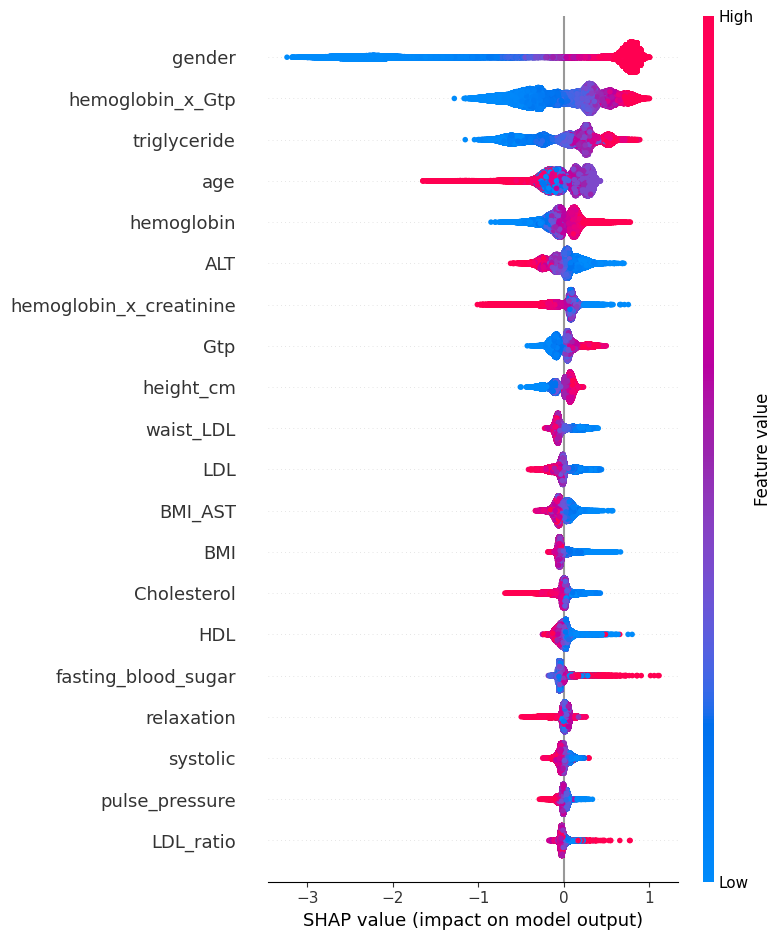

In [106]:
# LightGBM explainer
explainer_lgbm = shap.Explainer(lgbm_clf, X_train)  # 또는 TreeExplainer 사용 가능
shap_values_lgbm = explainer_lgbm(X_train, check_additivity=False)  # 13분 소요

# Summary plot for LightGBM
shap.summary_plot(shap_values_lgbm, X_train, show=True)

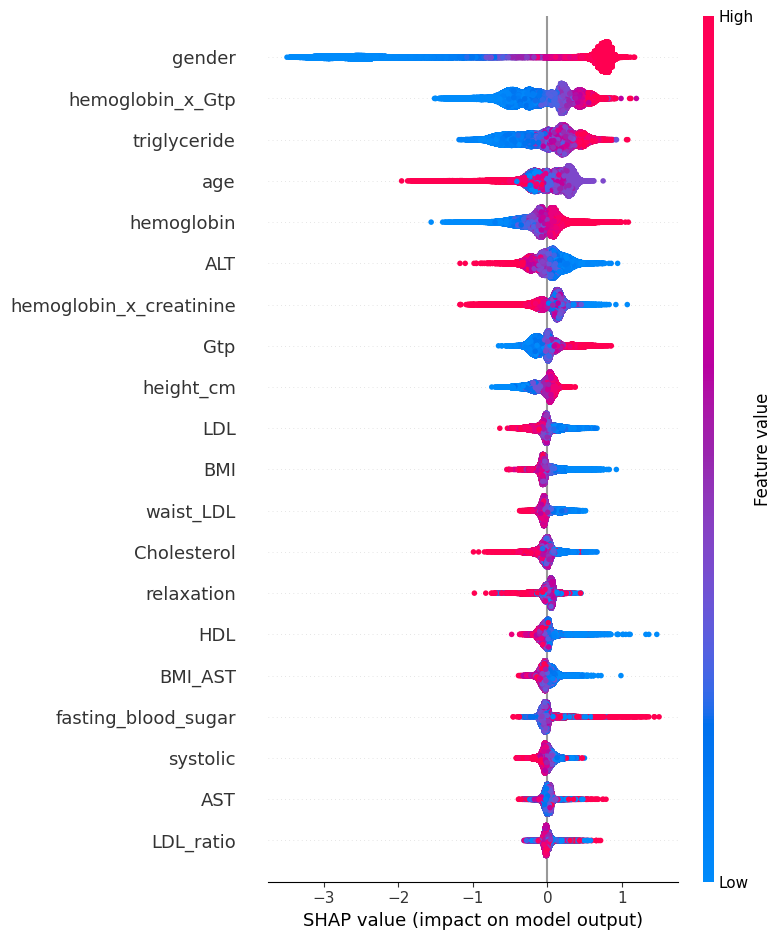

In [107]:
# XGBoost explainer
explainer_xgb = shap.Explainer(xgb_clf)  # best_xgb_model은 학습된 XGBoost 모델
shap_values_xgb = explainer_xgb(X_train) # 2분 소요

# Summary plot for XGBoost
shap.summary_plot(shap_values_xgb, X_train, show=True)

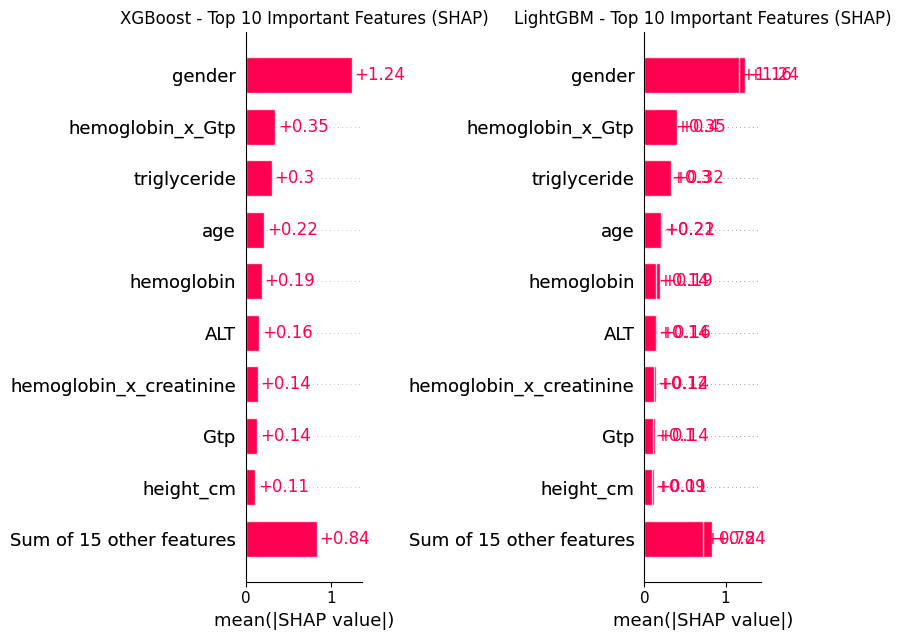

In [108]:
## 두 모델의 중요 변수 비교 (Bar Plot 버전)

# 서브플롯 설정 (1행 2열)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# XGBoost bar plot
shap.plots.bar(shap_values_xgb, max_display=10, show=False)
axes[0].set_title('XGBoost - Top 10 Important Features (SHAP)')
plt.sca(axes[0])  # 현재 axes 지정
shap.plots.bar(shap_values_xgb, max_display=10, show=False)

# LightGBM bar plot
plt.sca(axes[1])  # 오른쪽 subplot에 출력
shap.plots.bar(shap_values_lgbm, max_display=10, show=False)
axes[1].set_title('LightGBM - Top 10 Important Features (SHAP)')

plt.tight_layout()
plt.show()

## 4-4. 교차 검증
- Kfold, StratifiedKfold, cross_val_score 등

## 4-5. 하이퍼파라미터 튜닝
- GridSearchCV, RandomizedSearch CV 등

- early stopping 파라미터 반환 함수

    - 하이퍼파라미터 튜닝 중인 모델이 XGBoost 또는 LightGBM일 경우, 조기 종료(early stopping)와 평가 지표(log evaluation)를 위한 추가 학습 인자(fit_params)를 자동으로 설정해 준다.

In [109]:
def get_fit_params_with_early_stopping(model, X_train, X_test, y_train, y_test):
    """
    GridSearchCV/RandomizedSearchCV의 fit() 호출 시 사용할 fit_params 반환

    Parameters
    ----------
    model : 학습 대상 모델 객체
    X_train, X_test, y_train, y_test : 학습/평가 데이터

    Returns
    -------
    fit_params : dict
        모델 학습 시 fit()에 전달할 파라미터
    """

    eval_set = [(X_train, y_train), (X_test, y_test)]

    if isinstance(model, LGBMClassifier):
        return {
            'eval_set': eval_set,
            'eval_metric': 'auc',
            'callbacks': [
                early_stopping(stopping_rounds=100, verbose=False),
                log_evaluation(period=0)
            ]
        }

    elif isinstance(model, XGBClassifier):
        return {
            'eval_set': eval_set,
            'verbose': False
        }

    else:
        # 일반 모델은 fit_params 없이 return
        return {}

- 튜닝된 최적 모델 평가 함수

In [110]:
from sklearn.metrics import classification_report, roc_auc_score

def evaluate_best_model(grid_cv, X_test, y_test):
    """
    GridSearchCV/RandomizedSearchCV로 튜닝된 최적 모델을 테스트 세트에 대해 평가하는 함수

    Parameters
    ----------
    grid_cv : GridSearchCV 또는 RandomizedSearchCV 객체 (fit 완료된 상태)
    X_test : 테스트 피처
    y_test : 테스트 타겟

    Prints
    ------
    - 최적 하이퍼파라미터
    - 교차 검증 기반 Best F1 score
    - 테스트 ROC-AUC
    - 테스트 데이터의 classification_report: precision, recall, f1-score, support
    """

    print('Best Hyperparameters:', grid_cv.best_params_)
    print('Best F1 Score:', grid_cv.best_score_)

    best_model = grid_cv.best_estimator_
    pred = best_model.predict(X_test)
    pred_proba = best_model.predict_proba(X_test)[:, 1]

    print('Test ROC-AUC:', roc_auc_score(y_test, pred_proba))
    print(classification_report(y_test, pred))

    return best_model

<br>

- GridSearch: LightGBM

In [111]:
# from lightgbm import LGBMClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report, roc_auc_score

# # 튜닝 대상 파라미터
# lgbm_params = {
#     'n_estimators': [100, 200],
#     'learning_rate': [0.05, 0.1],
#     'max_depth': [3, 5, 7],
#     # 'num_leaves': [31, 64],
#     }

# # 모델 정의
# lgbm_clf = LGBMClassifier(boost_from_average=False,
#                           random_state=42,
#                           n_jobs=-1,
#                           verbosity=-1
#                          )

# # 조기 종료용 fit_params
# fit_params = get_fit_params_with_early_stopping(lgbm_clf, X_train, X_test, y_train, y_test)

# # GridSearchCV 정의
# grid_cv_lgbm = GridSearchCV(lgbm_clf, lgbm_params, cv=3, scoring='f1', n_jobs=-1, verbose=1)

# # 학습 시 추가 fit_params 전달
# grid_cv_lgbm.fit(X_train, y_train, **fit_params)

# # 최적 모델로 예측 및 평가
# best_lgbm_grid = evaluate_best_model(grid_cv_lgbm, X_test, y_test)

- GridSearch: XGBoost

In [112]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report, roc_auc_score

# # 튜닝 대상 파라미터
# xgb_params = {
#     'n_estimators': [100, 200],
#     'learning_rate': [0.05, 0.1],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
# }

# # 모델 정의
# xgb_clf = XGBClassifier(eval_metric='auc',
#                         early_stopping_rounds=10,
#                         use_label_encoder=False,
#                         random_state=42,
#                         n_jobs=-1
#                        )

# # 조기 종료용 fit_params
# fit_params = get_fit_params_with_early_stopping(xgb_clf, X_train, X_test, y_train, y_test)

# # GridSearchCV 정의
# grid_cv_xgb = GridSearchCV(xgb_clf, xgb_params, cv=3, scoring='f1', n_jobs=-1, verbose=1)

# # 학습 시 추가 fit_params 전달
# grid_cv_xgb.fit(X_train, y_train, **fit_params)

# # 최적 모델로 예측 및 평가
# best_xgb_grid = evaluate_best_model(grid_cv_xgb, X_test, y_test)

<br>

- RandomSearch: LightGBM

In [113]:
# from lightgbm import LGBMClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import classification_report, roc_auc_score

# # 튜닝 대상 파라미터
# lgbm_param_dist = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 5, 7, -1],
#     'num_leaves': [31, 64, 128],
#     'subsample': [0.7, 0.8, 1.0],
#     'colsample_bytree': [0.7, 0.8, 1.0]
# }

# # 모델 정의
# lgbm_clf = LGBMClassifier(boost_from_average=False, random_state=42, n_jobs=-1, verbosity=-1)

# # 조기 종료용 fit_params
# fit_params = get_fit_params_with_early_stopping(lgbm_clf, X_train, X_test, y_train, y_test)

# # RandomizedSearchCV 정의
# rand_cv_lgbm = RandomizedSearchCV(
#     estimator=lgbm_clf,
#     param_distributions=lgbm_param_dist,
#     n_iter=20,
#     scoring='f1',
#     cv=3,
#     n_jobs=-1,
#     verbose=1,
#     random_state=42
# )

# # 학습 시 추가 fit_params 전달
# rand_cv_lgbm.fit(X_train, y_train, **fit_params)

# # 최적 모델로 예측 및 평가
# best_lgbm_rand = evaluate_best_model(rand_cv_lgbm, X_test, y_test)

- RandomSearch: XGBoost

In [114]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import classification_report, roc_auc_score

# # 튜닝 대상 파라미터
# xgb_param_dist = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.7, 0.8, 1.0],
#     'colsample_bytree': [0.7, 0.8, 1.0],
#     'gamma': [0, 0.1, 0.3, 1]
# }

# # 모델 정의
# xgb_clf = XGBClassifier(use_label_encoder=False, random_state=42, n_jobs=-1)

# # 조기 종료용 fit_params
# fit_params = get_fit_params_with_early_stopping(xgb_clf, X_train, X_test, y_train, y_test)

# # RandomizedSearchCV 정의
# rand_cv_xgb = RandomizedSearchCV(
#     estimator=xgb_clf,
#     param_distributions=xgb_param_dist,
#     n_iter=20,
#     scoring='f1',
#     cv=3,
#     n_jobs=-1,
#     verbose=1,
#     random_state=42
# )

# # 학습 시 추가 fit_params 전달
# rand_cv_xgb.fit(X_train, y_train, **fit_params)

# # 최적 모델로 예측 및 평가
# best_xgb_rand = evaluate_best_model(rand_cv_xgb, X_test, y_test)

<br>
<br>

# 5. 모델 평가

## 5-1. 성능 지표 계산
- accuracy, precision, recall, F1, AUC 등

## 5-2. 결과 시각화
- 혼동행렬, ROC Curve, Precision-Recall Curve 등

# 6. 앙상블 기법 적용 (성능 개선 단계)

## 6-1. Voting
- Soft/hard

In [115]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score

# 각 모델 정의 (학습 속도 고려해 적절한 파라미터 설정)
xgb_clf = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

lgbm_clf = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=6,
    random_state=42
)

# Voting Classifier 정의
voting_clf = VotingClassifier(
    estimators=[
        ('xgb', xgb_clf),
        ('lgbm', lgbm_clf),
        ('rf', rf_clf)
    ],
    voting='soft',  # 소프트보팅 (확률 평균)
    n_jobs=-1
)

# 학습
voting_clf.fit(X_train, y_train)

# 예측
voting_pred = voting_clf.predict(X_test)
voting_prob = voting_clf.predict_proba(X_test)[:, 1]

# 평가
print('Classification Report:')
print(classification_report(y_test, voting_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, voting_prob):.4f}')
roc_auc_score(y_test, voting_prob)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.73      0.78     26881
           1       0.70      0.84      0.77     20896

    accuracy                           0.78     47777
   macro avg       0.78      0.78      0.77     47777
weighted avg       0.79      0.78      0.78     47777

ROC AUC Score: 0.8590


np.float64(0.8590178901901768)

In [116]:
voting_prob

array([0.04060317, 0.55634328, 0.01680689, ..., 0.68327061, 0.0292884 ,
       0.42112681])

## 6-2. Bagging
- Random Forest 등

In [117]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Bagging 모델 정의
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=5),  # 과적합 방지를 위해 깊이 제한
    n_estimators=50,                                     # 빠른 테스트를 위해 수 줄임
    random_state=42,
    n_jobs=-1                                             # 병렬 처리로 학습 속도 향상
)

# 학습
bagging_clf.fit(X_train, y_train)

# 예측
bagging_pred = bagging_clf.predict(X_test)
bagging_prob = bagging_clf.predict_proba(X_test)[:, 1]

# 평가
print('Classification Report:')
print(classification_report(y_test, bagging_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, bagging_prob):.4f}')

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.69      0.76     26881
           1       0.68      0.84      0.75     20896

    accuracy                           0.76     47777
   macro avg       0.77      0.77      0.76     47777
weighted avg       0.78      0.76      0.76     47777

ROC AUC Score: 0.8410


In [118]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

xgb_clf = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,          # row sampling (bagging 효과)
    colsample_bytree=0.8,   # feature sampling
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# 학습
xgb_clf.fit(X_train, y_train)

# 예측
xgb_pred = xgb_clf.predict(X_test)
xgb_prob = xgb_clf.predict_proba(X_test)[:, 1]

# 평가
print('Classification Report:')
print(classification_report(y_test, xgb_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, xgb_prob):.4f}')

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79     26881
           1       0.72      0.82      0.76     20896

    accuracy                           0.78     47777
   macro avg       0.78      0.78      0.78     47777
weighted avg       0.79      0.78      0.78     47777

ROC AUC Score: 0.8636


## 6-3. Boosting
- XGBoost, LightGBM 등

In [119]:
# Gradient Boosting 알고리즘 기반 단일 모델
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

print(classification_report(y_test, lgbm_pred))
print('ROC AUC:', roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79     26881
           1       0.71      0.82      0.76     20896

    accuracy                           0.78     47777
   macro avg       0.78      0.78      0.78     47777
weighted avg       0.79      0.78      0.78     47777

ROC AUC: 0.8615185481151598


## 6-4. Stacking
- StackingClassifier 활용

In [120]:
from sklearn.model_selection import KFold
from sklearn.base import clone
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

def get_stacking_base_datasets_binary(model, model_name, X_train, y_train, X_test, n_folds=5):
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    train_fold_pred = np.zeros((X_train.shape[0], 1))
    test_fold_pred = np.zeros((X_test.shape[0], n_folds))

    print(f'\n[{model_name}] 스태킹용 KFold 시작')

    for fold_idx, (train_idx, valid_idx) in enumerate(kf.split(X_train)):
        print(f'\t[Fold {fold_idx + 1}/{n_folds}]')

        X_tr, y_tr = X_train.iloc[train_idx], y_train.iloc[train_idx]
        X_val, y_val = X_train.iloc[valid_idx], y_train.iloc[valid_idx]

        model_clone = clone(model)
        model_clone.fit(X_tr, y_tr)

        val_pred = model_clone.predict_proba(X_val)[:, 1]  # 확률 예측
        train_fold_pred[valid_idx, :] = val_pred.reshape(-1, 1)

        test_pred = model_clone.predict_proba(X_test)[:, 1]
        test_fold_pred[:, fold_idx] = test_pred

    test_pred_mean = np.mean(test_fold_pred, axis=1).reshape(-1, 1)

    return train_fold_pred, test_pred_mean

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# base model 설정
models_to_stack = [
    ('Logistic', LogisticRegression(max_iter=1000)),
    ('RandomForest', RandomForestClassifier(n_estimators=200, max_depth=6, random_state=42)),
    ('LightGBM', LGBMClassifier(n_estimators=500, learning_rate=0.05, random_state=42)),
    ('XGBoost', XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=42)),
]

# 스태킹 학습 결과 저장
stack_train_preds = []
stack_test_preds = []

for name, model in models_to_stack:
    print(f'▶ Base model: {name}')

    # base 모델별 stacking 결과 얻기
    train_stack, test_stack = get_stacking_base_datasets_binary(
        model=model,
        model_name=name,
        X_train=X_train,       # 학습용 (train)
        y_train=y_train,       # 학습용 타겟
        X_test=X_test,         # 검증용 (val)
        n_folds=5
    )

    stack_train_preds.append(train_stack)  # stacking된 train 예측
    stack_test_preds.append(test_stack)    # stacking된 X_test 예측

# Meta 학습용 데이터로 변환 (열 방향으로 붙이기)
stacked_train = np.concatenate(stack_train_preds, axis=1)  # shape: (len(X_train), num_models)
stacked_test = np.concatenate(stack_test_preds, axis=1)    # shape: (len(X_test), num_models)

# 최종 meta 모델 학습
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

meta_model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, random_state=42)
meta_model.fit(stacked_train, y_train)

# 성능 평가 (X_test 대상)
meta_pred = meta_model.predict_proba(stacked_test)[:, 1]
print(f'Final Stacking ROC AUC: {roc_auc_score(y_test, meta_pred):.4f}')

▶ Base model: Logistic

[Logistic] 스태킹용 KFold 시작
	[Fold 1/5]
	[Fold 2/5]
	[Fold 3/5]
	[Fold 4/5]
	[Fold 5/5]
▶ Base model: RandomForest

[RandomForest] 스태킹용 KFold 시작
	[Fold 1/5]
	[Fold 2/5]
	[Fold 3/5]
	[Fold 4/5]
	[Fold 5/5]
▶ Base model: LightGBM

[LightGBM] 스태킹용 KFold 시작
	[Fold 1/5]
	[Fold 2/5]
	[Fold 3/5]
	[Fold 4/5]
	[Fold 5/5]
▶ Base model: XGBoost

[XGBoost] 스태킹용 KFold 시작
	[Fold 1/5]
	[Fold 2/5]
	[Fold 3/5]
	[Fold 4/5]
	[Fold 5/5]
Final Stacking ROC AUC: 0.8646


In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# 리스트로부터 열 방향으로 스태킹된 학습/테스트 데이터 생성
Stack_final_X_train = np.concatenate(stack_train_preds, axis=1)  # shape: (n_samples_train, n_models)
Stack_final_X_test = np.concatenate(stack_test_preds, axis=1)    # shape: (n_samples_test, n_models)

# 메타 모델 학습 (Logistic Regression)
meta_model = LogisticRegression(max_iter=1000)
meta_model.fit(Stack_final_X_train, y_train)

# 예측 및 평가 (검증용 데이터)
final_pred_prob = meta_model.predict_proba(Stack_final_X_test)[:, 1]
final_pred_label = (final_pred_prob >= 0.5)

In [123]:
from sklearn.metrics import classification_report, roc_auc_score

print('스태킹 메타 모델 성능 평가')
print('Accuracy:', accuracy_score(y_test, final_pred_label))
print('F1-score:', f1_score(y_test, final_pred_label))
print('ROC-AUC :', roc_auc_score(y_test, final_pred_prob))
print('\nClassification Report:\n', classification_report(y_test, final_pred_label))

스태킹 메타 모델 성능 평가
Accuracy: 0.7800196747388911
F1-score: 0.7613858239113654
ROC-AUC : 0.8641415726809778

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.80     26881
           1       0.72      0.80      0.76     20896

    accuracy                           0.78     47777
   macro avg       0.78      0.78      0.78     47777
weighted avg       0.79      0.78      0.78     47777



```
스태킹 메타 모델 성능 평가
Accuracy: 0.7799359524457374
F1-score: 0.7609259175042067
ROC-AUC : 0.8654225840986076

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.80     26881
           1       0.72      0.80      0.76     20896

    accuracy                           0.78     47777
   macro avg       0.78      0.78      0.78     47777
weighted avg       0.78      0.78      0.78     47777
```

## 6-4. Fine-tuning


In [124]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

def evaluate_custom_classifier(model, X_test, y_test):
    """
    수동 설정한 분류 모델을 테스트 세트에 대해 평가한다.

    Parameters
    ----------
    model : 학습 완료된 분류 모델 객체
    X_test : 테스트 피처 (ndarray 또는 DataFrame)
    y_test : 테스트 타겟 (0 또는 1)

    Returns
    -------
    model : 입력된 모델 그대로 반환
    """

    pred = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)[:, 1]

    print('\nCustom Classifier Evaluation')
    print(f'Accuracy : {accuracy_score(y_test, pred):.4f}')
    print(f'ROC AUC  : {roc_auc_score(y_test, pred_proba):.4f}')
    print(f'F1 Score : {f1_score(y_test, pred):.4f}')

    return model

In [125]:
from lightgbm import LGBMClassifier

# LightGBM 커스텀 모델 정의
custom_lgbm_clf = LGBMClassifier(
    # 주요 튜닝 파라미터
    n_estimators=1000,
    learning_rate=0.03,
    max_depth=4,
    num_leaves=31,

    # 규제
    reg_alpha=0.1,
    reg_lambda=0.1,

    # 샘플링
    subsample=0.8,
    colsample_bytree=0.8,

    # 기타
    random_state=42,
    n_jobs=-1,
    verbosity=-1
)

# 평가 함수 호출 (fit_params 없이도 내부에서 early_stopping 자동 적용됨)
get_model_train_eval(
    model=custom_lgbm_clf,
    model_name='LightGBM',
    ftr_train=X_train,
    ftr_test=X_test,
    tgt_train=y_train,
    tgt_test=y_test
)

LightGBM 결과
Confusion Matrix:
[[20118  6763]
 [ 3754 17142]]
Accuracy: 0.7799, Precision: 0.7171, Recall: 0.8203, F1: 0.7653
ROC-AUC: 0.8641


In [126]:
from xgboost import XGBClassifier

# 모델 정의
xgb_clf = XGBClassifier(
    n_estimators=973,
    learning_rate= 0.034608357960129406,
    max_depth=10,
    min_child_weight=3,
    gamma=0,
    subsample=0.9504791909105347,
    colsample_bytree=0.3028813045040783,
    reg_alpha=0,
    reg_lambda=1,
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

# 학습 및 평가
get_model_train_eval(
    model=xgb_clf,
    model_name='XGBoost',
    ftr_train=X_train,
    ftr_test=X_test,
    tgt_train=y_train,
    tgt_test=y_test
)

XGBoost 결과
Confusion Matrix:
[[20435  6446]
 [ 3948 16948]]
Accuracy: 0.7824, Precision: 0.7245, Recall: 0.8111, F1: 0.7653
ROC-AUC: 0.8658


In [127]:
# XGBoost 교차검증

from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
import numpy as np

# 전체 train_df에서 분리
X_all = train_df.drop(columns='smoking')
y_all = train_df['smoking']

# 예측값 누적용 (X_test는 train_test_split으로 분리해놓은 것)
val_scores = []
test_preds = np.zeros(len(X_test))

# X_test 컬럼 순서와 X_all 일치시킴 (예방 차원)
X_test = X_test[X_all.columns]

# 5-fold 교차 검증
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(X_all, y_all)):
    print(f'Fold {fold + 1}')

    X_train_fold, X_val_fold = X_all.iloc[train_idx], X_all.iloc[val_idx]
    y_train_fold, y_val_fold = y_all.iloc[train_idx], y_all.iloc[val_idx]

    # 모델 정의
    xgb_clf = XGBClassifier(
        n_estimators=1000,
        learning_rate=0.03,
        max_depth=8,
        min_child_weight=3,
        gamma=0,
        subsample=0.9,
        colsample_bytree=0.5,
        reg_alpha=0,
        reg_lambda=1,
        eval_metric='auc',
        use_label_encoder=False,
        random_state=fold,
        n_jobs=-1
    )

    # 조기 종료 포함
    xgb_clf.fit(
        X_train_fold, y_train_fold,
        eval_set=[(X_val_fold, y_val_fold)],
        verbose=50
    )

    # 검증 성능 저장
    val_pred = xgb_clf.predict_proba(X_val_fold)[:, 1]
    auc = roc_auc_score(y_val_fold, val_pred)
    print(f'Fold {fold + 1} AUC: {auc:.4f}')
    val_scores.append(auc)

    # X_test에 대한 예측 누적
    test_preds += xgb_clf.predict_proba(X_test)[:, 1] / skf.n_splits

print(f'\n평균 Validation AUC: {np.mean(val_scores):.4f}')

Fold 1
[0]	validation_0-auc:0.83501
[50]	validation_0-auc:0.85653
[100]	validation_0-auc:0.85943
[150]	validation_0-auc:0.86133
[200]	validation_0-auc:0.86263
[250]	validation_0-auc:0.86354
[300]	validation_0-auc:0.86411
[350]	validation_0-auc:0.86455
[400]	validation_0-auc:0.86484
[450]	validation_0-auc:0.86514
[500]	validation_0-auc:0.86532
[550]	validation_0-auc:0.86555
[600]	validation_0-auc:0.86566
[650]	validation_0-auc:0.86575
[700]	validation_0-auc:0.86596
[750]	validation_0-auc:0.86605
[800]	validation_0-auc:0.86617
[850]	validation_0-auc:0.86621
[900]	validation_0-auc:0.86625
[950]	validation_0-auc:0.86628
[999]	validation_0-auc:0.86629
Fold 1 AUC: 0.8663
Fold 2
[0]	validation_0-auc:0.83764
[50]	validation_0-auc:0.85864
[100]	validation_0-auc:0.86202
[150]	validation_0-auc:0.86394
[200]	validation_0-auc:0.86532
[250]	validation_0-auc:0.86609
[300]	validation_0-auc:0.86674
[350]	validation_0-auc:0.86729
[400]	validation_0-auc:0.86771
[450]	validation_0-auc:0.86796
[500]	valida

<br>
<br>

# 7. 최종 모델 선정 및 저장

## 7-1. 테스트셋 재평가 및 비교

In [29]:
# 학습 및 테스트에서 id 제거
X_all = train_df.drop(columns=['smoking'])
y_all = train_df['smoking']
X_test = test_df

X_test = X_test[X_all.columns]  # 컬럼 순서 맞추기

In [30]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# 1. 정답과 id 컬럼 제외하고 train/test 결합
combined = pd.concat([X_all, X_test], axis=0).reset_index(drop=True)

# 2. 수치형 컬럼만 정규화
numerical_cols = combined.select_dtypes(include=['float64', 'int64']).columns

# 3. 정규화 적용
scaler = StandardScaler()
combined[numerical_cols] = scaler.fit_transform(combined[numerical_cols])

# 4. 다시 분리
X_all_scaled = combined.iloc[:len(X_all)].copy().reset_index(drop=True)
X_test_scaled = combined.iloc[len(X_all):].copy().reset_index(drop=True)

# 5. train_df와 test_df에 정규화 값 반영
train_scaled_df = train_df.copy()
test_scaled_df = test_df.copy()
train_scaled_df.loc[:, numerical_cols] = X_all_scaled[numerical_cols].values
test_scaled_df.loc[:, numerical_cols] = X_test_scaled[numerical_cols].values

In [31]:
# 정규화 후 평균이 0, 표준편차가 1에 가까운지 확인
print('train_scaled_df 평균:\n', train_scaled_df[numerical_cols].mean().round(2))
print('train_scaled_df 표준편차:\n', train_scaled_df[numerical_cols].std().round(2))

train_scaled_df 평균:
 age                       -0.0
height_cm                  0.0
waist_cm                   0.0
systolic                   0.0
relaxation                 0.0
fasting_blood_sugar       -0.0
Cholesterol               -0.0
triglyceride               0.0
HDL                       -0.0
LDL                       -0.0
hemoglobin                 0.0
AST                       -0.0
ALT                       -0.0
Gtp                        0.0
gender                     0.0
BMI                       -0.0
WHTR                      -0.0
pulse_pressure            -0.0
MAP                        0.0
LDL_ratio                 -0.0
BMI_AST                   -0.0
waist_LDL                 -0.0
hemoglobin_x_Gtp           0.0
hemoglobin_x_creatinine    0.0
dtype: float64
train_scaled_df 표준편차:
 age                        1.00
height_cm                  1.00
waist_cm                   1.00
systolic                   1.00
relaxation                 1.00
fasting_blood_sugar        1.00
Chole

In [32]:
# Train/Test 분포 차이 확인 → Adversarial Validation
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# train_adv = train_scaled_df.drop(columns=['smoking', 'id']).copy()
# test_adv = test_scaled_df.drop(columns=['id']).copy()
# id, smoking 컬럼 제거 && 정규화 완료 상태
train_adv = train_scaled_df.drop(columns='smoking').copy()
test_adv = test_scaled_df.copy()

train_adv['is_test'] = 0
test_adv['is_test'] = 1

# 합치기
combined = pd.concat([train_adv, test_adv], axis=0)
y_adv = combined['is_test']
X_adv = combined.drop(columns='is_test')

# 학습/검증 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_adv, y_adv, test_size=0.3, random_state=42)

# 모델 학습
adv_model = XGBClassifier(n_estimators=100, max_depth=4, n_jobs=-1)
adv_model.fit(X_tr, y_tr)

# 예측 및 평가
adv_pred = adv_model.predict_proba(X_val)[:, 1]
adv_auc = roc_auc_score(y_val, adv_pred)
print(f'Adversarial Validation AUC: {adv_auc:.4f}')

Adversarial Validation AUC: 0.5020


train 데이터와 test 데이터의 분포가 거의 동일하다는 의미이다.

이제 데이터 분포 차이로 인한 성능 저하는 해결된 상태이다. 하지만 여전히 과적합 또는 불안정한 피처/하이퍼파라미터가 남아 있을 수 있다.

In [33]:
# Adversarial 모델이 중요하다고 판단한 피처 제거하기

from sklearn.inspection import permutation_importance

result = permutation_importance(adv_model, X_val, y_val, n_repeats=10, random_state=42, n_jobs=-1)
importance_df = pd.DataFrame({
    'feature': X_val.columns,
    'importance': result.importances_mean
}).sort_values(by='importance', ascending=False)

print(importance_df.head(20))

# 여기서 상위 10~20개의 feature가 train/test를 구분하는 데 결정적이다.
# 이 변수들을 모델 학습에서 제외하면 train/test 간의 분포 차이를 줄일 수 있다.

                    feature  importance
14                   gender    0.012730
0                       age    0.007841
2                  waist_cm    0.004321
1                 height_cm    0.003484
13                      Gtp    0.002061
22         hemoglobin_x_Gtp    0.001234
16                     WHTR    0.001110
10               hemoglobin    0.001083
9                       LDL    0.000902
20                  BMI_AST    0.000794
11                      AST    0.000786
6               Cholesterol    0.000687
12                      ALT    0.000625
18                      MAP    0.000615
21                waist_LDL    0.000571
5       fasting_blood_sugar    0.000568
23  hemoglobin_x_creatinine    0.000537
8                       HDL    0.000377
7              triglyceride    0.000275
3                  systolic    0.000270


Adversarial Validation에서 gender, age, waist_cm 등이 train과 test를 구별하는 데 큰 역할을 한다.

이 변수들이 train/test 간 데이터 분포 차이를 야기하고 있다는 의미이며, 일반화 성능을 떨어뜨릴 수 있는 위험 요인이다.



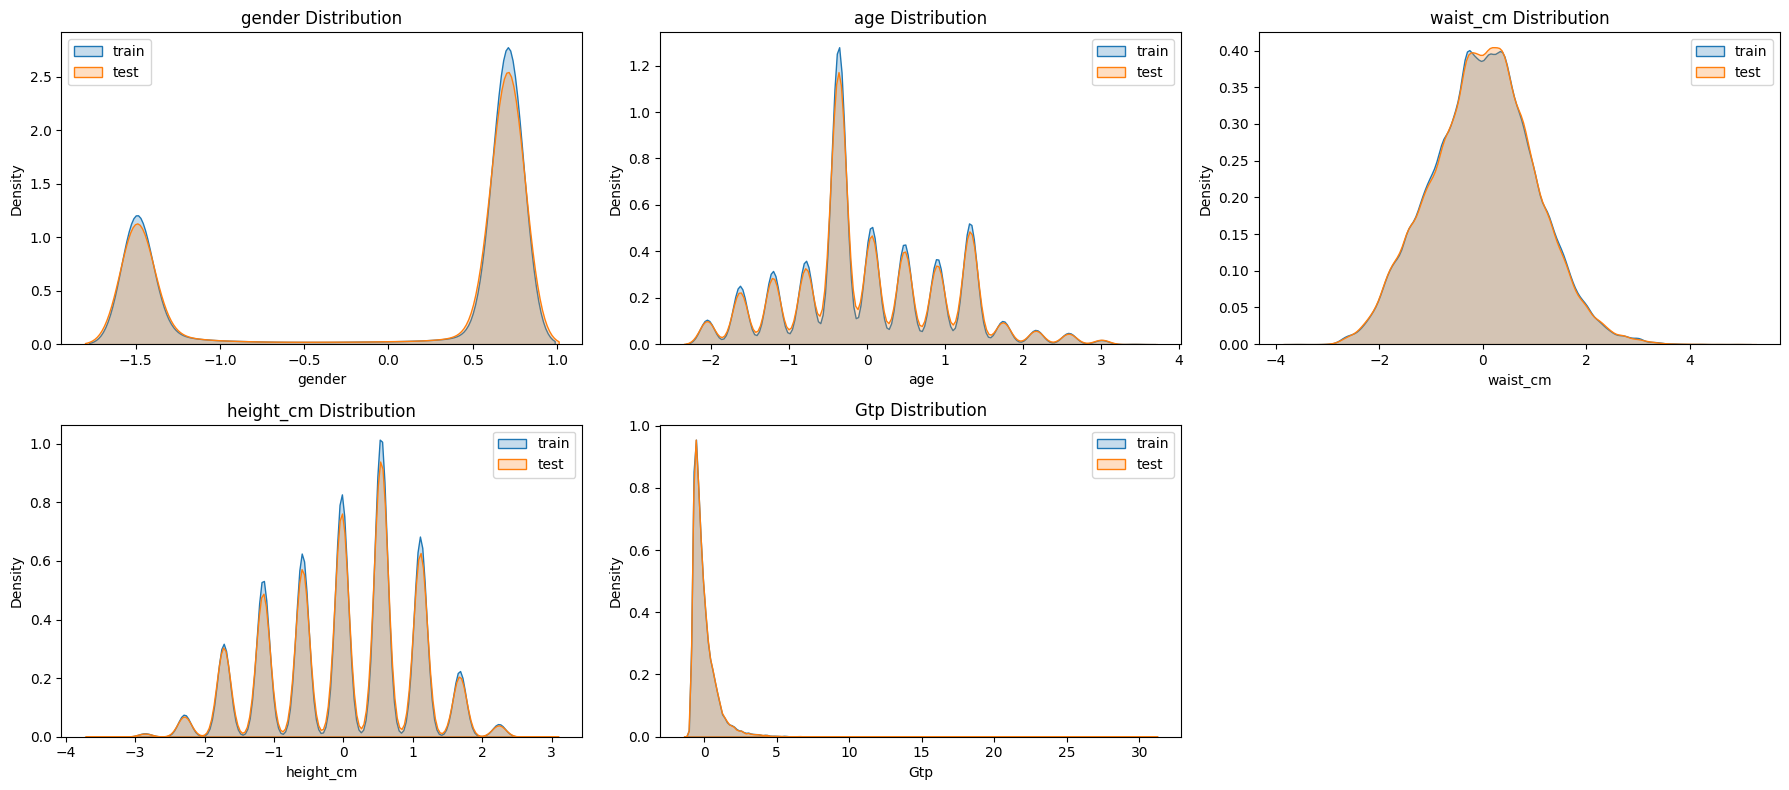

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['gender', 'age', 'waist_cm', 'height_cm', 'Gtp']
n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.kdeplot(train_scaled_df[col], label='train', fill=True, ax=axes[i])
    sns.kdeplot(test_scaled_df[col], label='test', fill=True, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')
    axes[i].legend()

for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Adversarial Validation은 원래 train vs test 구분이 잘 되는 피처를 찾아서 그 피처가 test 분포에 과적합될 위험이 있는지 판단하는 목적이다.

하지만 앞서 확인했 듯 AUC가 완전히 랜덤 수준(0.5)에 가깝기 때문에 모델이 train과 test를 구분하지 못하고 있다는 뜻이고, 따라서 분포 차이가 거의 없거나 무시할 수준이라는 것을 알 수 있다

이런 상황에서는 feature importance를 기준으로 피처를 제거하면 오히려 성능 저하로 이어질 수 있으므로 drop하지 않는다.



## 7-2. 모델 저장
- pickle, joblib 등

In [37]:
"""
XGBoost
평균 Validation AUC:
Submission score:
"""

from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd

# 정규화된 데이터 기반으로 재설정
X_all = train_scaled_df.drop(columns='smoking')
y_all = train_scaled_df['smoking']
test_df = test_scaled_df.copy()

# 혹시 모를 smoking 컬럼 제거
if 'smoking' in test_df.columns:
    test_df.drop(columns='smoking', inplace=True)

# 기본 파라미터
xgb_params = {
    'n_estimators': 500,
    'learning_rate': 0.05,
    'max_depth': 3,
    'use_label_encoder': False,
    'eval_metric': 'auc',
    'random_state': 42
}

print('▶ 전체 학습 데이터로 모델 학습 시작')

model = XGBClassifier(**xgb_params)

# test_df 정렬
test_input = test_df[X_all.columns]

# 예측값 생성 (Pseudo-labeling을 위해 한 번 학습)
model.fit(X_all, y_all)
test_preds = model.predict_proba(test_input)[:, 1]

# Pseudo-labeling 적용
pseudo_threshold = 0.95
pseudo_labels = (test_preds > pseudo_threshold).astype(int)
pseudo_idx = (test_preds > pseudo_threshold) | (test_preds < (1 - pseudo_threshold))

# DataFrame으로 유지
X_pseudo = test_input[pseudo_idx]
y_pseudo = pseudo_labels[pseudo_idx]

# 원래 학습 데이터도 DataFrame 유지
X_all_df = pd.DataFrame(X_all, columns=X_all.columns)
y_all_series = pd.Series(y_all)

# Concatenate (axis=0)
X_combined = pd.concat([X_all_df, X_pseudo], axis=0).reset_index(drop=True)
y_combined = pd.concat([y_all_series, pd.Series(y_pseudo)], axis=0).reset_index(drop=True)

# 모델 재학습
model.fit(X_combined, y_combined)

# 테스트 데이터 예측
test_input = test_df[X_all.columns]
test_preds = model.predict_proba(test_input)[:, 1]

# 학습 데이터 AUC 확인
train_preds = model.predict_proba(X_all)[:, 1]
train_auc = roc_auc_score(y_all, train_preds)
print(f'\n학습 데이터 ROC-AUC: {train_auc:.4f}')

▶ 전체 학습 데이터로 모델 학습 시작

학습 데이터 ROC-AUC: 0.8687


In [38]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

print('Threshold\tF1\t\tAccuracy\tPrecision\tRecall')
for thresh in np.arange(0.30, 0.71, 0.01):
    pred_labels = (train_preds >= thresh).astype(int)

    f1 = f1_score(y_all, pred_labels)
    acc = accuracy_score(y_all, pred_labels)
    precision = precision_score(y_all, pred_labels)
    recall = recall_score(y_all, pred_labels)

    print(f'{thresh:.2f}\t\t{f1:.4f}\t{acc:.4f}\t\t{precision:.4f}\t\t{recall:.4f}')

Threshold	F1		Accuracy	Precision	Recall
0.30		0.7708	0.7541		0.6508		0.9450
0.31		0.7717	0.7563		0.6536		0.9419
0.32		0.7727	0.7584		0.6565		0.9389
0.33		0.7735	0.7605		0.6595		0.9352
0.34		0.7742	0.7624		0.6625		0.9313
0.35		0.7749	0.7645		0.6657		0.9271
0.36		0.7757	0.7666		0.6690		0.9227
0.37		0.7764	0.7686		0.6724		0.9184
0.38		0.7769	0.7705		0.6759		0.9134
0.39		0.7772	0.7723		0.6792		0.9081
0.40		0.7776	0.7741		0.6827		0.9031
0.41		0.7774	0.7754		0.6862		0.8965
0.42		0.7772	0.7768		0.6897		0.8902
0.43		0.7772	0.7783		0.6934		0.8839
0.44		0.7769	0.7796		0.6970		0.8775
0.45		0.7763	0.7807		0.7007		0.8703
0.46		0.7760	0.7820		0.7046		0.8634
0.47		0.7750	0.7829		0.7087		0.8550
0.48		0.7742	0.7839		0.7130		0.8469
0.49		0.7731	0.7848		0.7173		0.8382
0.50		0.7711	0.7849		0.7213		0.8283
0.51		0.7688	0.7847		0.7250		0.8181
0.52		0.7659	0.7843		0.7288		0.8071
0.53		0.7633	0.7840		0.7329		0.7964
0.54		0.7604	0.7836		0.7371		0.7852
0.55		0.7567	0.7827		0.7413		0.7728
0.56		0.7527	0.7817		0.7

In [153]:
"""
XGBoost
평균 Validation AUC: 0.8674
Submission score: 0.78905
"""

# # 5. 혹시 모를 smoking 컬럼 제거 (train_df로부터 흘러들어왔을 경우)
# if 'smoking' in test_df.columns:
#     test_df.drop(columns='smoking', inplace=True)

# # 3. 전체 학습 데이터 분리
# X_all = train_df.drop(columns='smoking')
# y_all = train_df['smoking']

# # 4. 컬럼 순서 맞추기 (예방 차원)
# test_df = test_df[X_all.columns]

# # 5. 5-Fold 교차검증 기반 예측
# print('▶ 5-Fold Cross Validation 시작...')
# n_splits = 5
# skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# val_scores = []
# test_preds = np.zeros(len(test_df))  # test_df 길이만큼 0으로 초기화

# # 고정 파라미터 (수정 가능)
# xgb_params = {
#     'n_estimators' : 973,
#     'learning_rate' :  0.034608357960129406,
#     'max_depth' : 10,
#     'min_child_weight': 3,
#     'gamma': 0,
#     'subsample': 0.9504791909105347,
#     'colsample_bytree': 0.3028813045040783,
#     'reg_alpha': 0,
#     'reg_lambda': 1,
#     'eval_metric': 'auc',
#     'use_label_encoder': False,
#     'random_state': 42,
#     'n_jobs': -1
# }
#     # first parameter
#     # 'n_estimators': 1000,
#     # 'learning_rate': 0.03,
#     # 'max_depth': 8,
#     # 'min_child_weight': 3,
#     # 'gamma': 0,
#     # 'subsample': 0.9,
#     # 'colsample_bytree': 0.5,
#     # 'reg_alpha': 0,
#     # 'reg_lambda': 1,
#     # 'eval_metric': 'auc',
#     # 'use_label_encoder': False,
#     # 'random_state': 42,
#     # 'n_jobs': -1



# for fold, (train_idx, val_idx) in enumerate(skf.split(X_all, y_all)):
#     print(f'\n▶ Fold {fold + 1}')

#     X_train_fold, X_val_fold = X_all.iloc[train_idx], X_all.iloc[val_idx]
#     y_train_fold, y_val_fold = y_all.iloc[train_idx], y_all.iloc[val_idx]

#     xgb_clf = XGBClassifier(**xgb_params)

#     xgb_clf.fit(
#         X_train_fold, y_train_fold,
#         eval_set=[(X_val_fold, y_val_fold)],
#         verbose=50
#     )

#     # 검증 AUC 저장
#     val_pred = xgb_clf.predict_proba(X_val_fold)[:, 1]
#     auc = roc_auc_score(y_val_fold, val_pred)
#     print(f'Fold {fold + 1} AUC: {auc:.4f}')
#     val_scores.append(auc)

#     # 테스트 데이터 예측 누적
#     test_preds += xgb_clf.predict_proba(test_df)[:, 1] / n_splits

# # 6. 5-Fold 평균 AUC 출력
# print(f'\n평균 Validation AUC: {np.mean(val_scores):.4f}')

'\nXGBoost\n평균 Validation AUC: 0.8674\nSubmission score: 0.78905\n'

In [154]:
"""
LightGBM
평균 Validation AUC: 0.8668
Submission score: 0.78804
"""

# from lightgbm import LGBMClassifier
# from lightgbm import early_stopping, log_evaluation

# # 5. 혹시 모를 smoking 컬럼 제거 (train_df로부터 흘러들어왔을 경우)
# if 'smoking' in test_df.columns:
#     test_df.drop(columns='smoking', inplace=True)

# # 3. 전체 학습 데이터 분리
# X_all = train_df.drop(columns='smoking')
# y_all = train_df['smoking']

# # 4. 컬럼 순서 맞추기 (예방 차원)
# test_df = test_df[X_all.columns]

# # 5. 5-Fold 교차검증 기반 예측
# print('▶ 5-Fold Cross Validation 시작...')
# n_splits = 5
# skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# val_scores = []
# test_preds = np.zeros(len(test_df))  # test_df 길이만큼 0으로 초기화

# # 고정 파라미터 (수정 가능)

# lgbm_params = {
#     'n_estimators': 1000,
#     'learning_rate': 0.03,
#     'max_depth': 8,
#     'min_child_weight': 3,
#     'subsample': 0.9,
#     'colsample_bytree': 0.5,
#     'random_state': 42,
#     'n_jobs': -1
# }


# for fold, (train_idx, val_idx) in enumerate(skf.split(X_all, y_all)):
#     print(f'\n▶ Fold {fold + 1}')

#     X_train_fold, X_val_fold = X_all.iloc[train_idx], X_all.iloc[val_idx]
#     y_train_fold, y_val_fold = y_all.iloc[train_idx], y_all.iloc[val_idx]

#     model = LGBMClassifier(**lgbm_params)

#     model.fit(
#         X_train_fold, y_train_fold,
#         eval_set=[(X_val_fold, y_val_fold)],
#         callbacks=[early_stopping(stopping_rounds=50), log_evaluation(50)]
#     )

#     # 검증 AUC 저장
#     val_pred = model.predict_proba(X_val_fold)[:, 1]
#     auc = roc_auc_score(y_val_fold, val_pred)
#     print(f'Fold {fold + 1} AUC: {auc:.4f}')
#     val_scores.append(auc)

#     # 테스트 데이터 예측 누적
#     test_preds += model.predict_proba(test_df)[:, 1] / n_splits

# # 6. 5-Fold 평균 AUC 출력
# print(f'\n평균 Validation AUC: {np.mean(val_scores):.4f}')

'\nLightGBM\n평균 Validation AUC: 0.8668\nSubmission score: 0.78804\n'

In [ ]:
!pip install catboost

In [155]:
"""
CatBoost
평균 Validation AUC: 0.8651
Submission score: 0.78571
"""

# from catboost import CatBoostClassifier

# # 5. 혹시 모를 smoking 컬럼 제거 (train_df로부터 흘러들어왔을 경우)
# if 'smoking' in test_df.columns:
#     test_df.drop(columns='smoking', inplace=True)

# # 3. 전체 학습 데이터 분리
# X_all = train_df.drop(columns='smoking')
# y_all = train_df['smoking']

# # 4. 컬럼 순서 맞추기 (예방 차원)
# test_df = test_df[X_all.columns]

# # 5. 5-Fold 교차검증 기반 예측
# print('▶ 5-Fold Cross Validation 시작...')
# n_splits = 5
# skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# val_scores = []
# test_preds = np.zeros(len(test_df))  # test_df 길이만큼 0으로 초기화

# # 고정 파라미터 (수정 가능)
# cat_params = {
#     'iterations': 1000,
#     'learning_rate': 0.03,
#     'depth': 8,
#     'eval_metric': 'AUC',
#     'random_seed': 42,
#     'verbose': 50,
#     'task_type': 'CPU'  # GPU 사용 가능하면 'GPU'
# }


# for fold, (train_idx, val_idx) in enumerate(skf.split(X_all, y_all)):
#     print(f'\n▶ Fold {fold + 1}')

#     X_train_fold, X_val_fold = X_all.iloc[train_idx], X_all.iloc[val_idx]
#     y_train_fold, y_val_fold = y_all.iloc[train_idx], y_all.iloc[val_idx]

#     model = CatBoostClassifier(**cat_params)

#     model.fit(
#         X_train_fold, y_train_fold,
#         eval_set=[(X_val_fold, y_val_fold)],
#         verbose=50
#     )

#     # 검증 AUC 저장
#     val_pred = model.predict_proba(X_val_fold)[:, 1]
#     auc = roc_auc_score(y_val_fold, val_pred)
#     print(f'Fold {fold + 1} AUC: {auc:.4f}')
#     val_scores.append(auc)

#     # 테스트 데이터 예측 누적
#     test_preds += model.predict_proba(test_df)[:, 1] / n_splits

# # 6. 5-Fold 평균 AUC 출력
# print(f'\n평균 Validation AUC: {np.mean(val_scores):.4f}')

'\nCatBoost\n평균 Validation AUC: 0.8651\nSubmission score: 0.78571\n'

In [156]:
"""
Voting
평균 Validation AUC: 0.8684
Submission score: 0.78783
"""

# from sklearn.ensemble import VotingClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier

# # 5. 혹시 모를 smoking 컬럼 제거 (train_df로부터 흘러들어왔을 경우)
# if 'smoking' in test_df.columns:
#     test_df.drop(columns='smoking', inplace=True)

# # 3. 전체 학습 데이터 분리
# X_all = train_df.drop(columns='smoking')
# y_all = train_df['smoking']

# # 4. 컬럼 순서 맞추기 (예방 차원)
# test_df = test_df[X_all.columns]

# # 5. 5-Fold 교차검증 기반 예측
# print('▶ 5-Fold Cross Validation 시작...')
# n_splits = 5
# skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# val_scores = []
# test_preds = np.zeros(len(test_df))  # test_df 길이만큼 0으로 초기화

# # 고정 파라미터 (수정 가능)
# model = VotingClassifier(
#     estimators=[
#         ('xgb', XGBClassifier(**xgb_params)),
#         ('lgb', LGBMClassifier(**lgbm_params)),
#         ('cat', CatBoostClassifier(verbose=0, iterations=500))
#     ],
#     voting='soft',  # predict_proba 기반
#     n_jobs=-1
# )


# for fold, (train_idx, val_idx) in enumerate(skf.split(X_all, y_all)):
#     print(f'\n▶ Fold {fold + 1}')

#     X_train_fold, X_val_fold = X_all.iloc[train_idx], X_all.iloc[val_idx]
#     y_train_fold, y_val_fold = y_all.iloc[train_idx], y_all.iloc[val_idx]

#     model.fit(X_train_fold, y_train_fold)

#     val_pred = model.predict_proba(X_val_fold)[:, 1]
#     auc = roc_auc_score(y_val_fold, val_pred)
#     print(f'Fold {fold + 1} AUC: {auc:.4f}')
#     val_scores.append(auc)

#     # 테스트 데이터 예측 누적
#     test_preds += model.predict_proba(test_df)[:, 1] / n_splits

# # 6. 5-Fold 평균 AUC 출력
# print(f'\n평균 Validation AUC: {np.mean(val_scores):.4f}')

'\nVoting\n평균 Validation AUC: 0.8684\nSubmission score: 0.78783\n'

## 7-3. 예측 결과 저장
- csv 파일로 export

In [39]:
best_thresh = 0.4

# 제출 파일 생성
submission = pd.DataFrame({
    'id': test_ids,
    'smoking': (test_preds >= best_thresh).astype(int)
})
submission.to_csv('submission.csv', index=False)
print('submission.csv 파일 저장 완료')

submission.csv 파일 저장 완료


In [162]:
# -------------------------------------------------------------

# # 전체 학습 데이터로 재학습 후 제출 (선택 사항)
# print('\n▶ 전체 데이터로 재학습 후 예측 시작')
# xgb_final = XGBClassifier(**xgb_params)
# xgb_final.fit(X_all, y_all)

# # 예측
# final_probs = xgb_final.predict_proba(test_df)[:, 1]
# final_preds = (final_probs >= 0.5).astype(int)

# # 제출 파일 생성 (전체 학습 데이터 기반)
# submission_full = pd.DataFrame({
#     'id': test_ids,
#     'smoking': final_preds
# })
# submission_full.to_csv('submission_full.csv', index=False)
# print('submission_full.csv 파일 저장 완료')

# 선택적으로 어떤 버전을 제출할지 결정

In [40]:
submission.head()

id  smoking
0  159256        1
1  159257        0
2  159258        1
3  159259        0
4  159260        1

In [41]:
# 누락된 컬럼 있는지 확인
print('Train Columns:', set(X_all.columns))
print('Test Columns :', set(test_df.columns))
print('차집합 (Train - Test):', set(X_all.columns) - set(test_df.columns))  # 누락 컬럼
print('차집합 (Test - Train):', set(test_df.columns) - set(X_all.columns))  # 추가 컬럼

Train Columns: {'pulse_pressure', 'HDL', 'LDL_ratio', 'BMI', 'systolic', 'Cholesterol', 'waist_LDL', 'ALT', 'MAP', 'waist_cm', 'LDL', 'BMI_AST', 'age', 'WHTR', 'relaxation', 'hemoglobin_x_Gtp', 'hemoglobin', 'AST', 'gender', 'Gtp', 'hemoglobin_x_creatinine', 'triglyceride', 'fasting_blood_sugar', 'height_cm'}
Test Columns : {'pulse_pressure', 'HDL', 'LDL_ratio', 'BMI', 'systolic', 'Cholesterol', 'waist_LDL', 'ALT', 'MAP', 'waist_cm', 'LDL', 'BMI_AST', 'age', 'WHTR', 'relaxation', 'hemoglobin_x_Gtp', 'hemoglobin', 'AST', 'gender', 'Gtp', 'hemoglobin_x_creatinine', 'triglyceride', 'fasting_blood_sugar', 'height_cm'}
차집합 (Train - Test): set()
차집합 (Test - Train): set()


In [42]:
print('train_df shape:', train_df.shape)
print('X_all shape:', X_all.shape)
print('test_df shape:', test_df.shape)

train_df shape: (159256, 25)
X_all shape: (159256, 24)
test_df shape: (106171, 24)


In [43]:
print(len(test_preds))      # 예측된 수
print(len(test_ids))        # 제출용 id 수
assert len(test_preds) == len(test_ids), 'ID 수와 예측 수가 맞지 않습니다'

106171
106171
